<a href="https://colab.research.google.com/github/MTayyab7/Skin_cancer_CNN_model/blob/main/CNN_SkinCancer_Model_train_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import os

# Replace '/content/drive/My Drive/path/to/your/train cancer' with the actual path to your folder
folder_path = '/content/drive/MyDrive/train_cancer'

# Check if the folder exists and list its contents
if os.path.exists(folder_path):
    print(f"Contents of '{folder_path}':")
    print(os.listdir(folder_path))
else:
    print(f"Folder not found at '{folder_path}'. Please check the path.")

Contents of '/content/drive/MyDrive/train_cancer':
['malignant', 'benign']


In [ ]:
import os

drive_path = '/content/drive/MyDrive/'

print(f"Listing contents of: {drive_path}")
for root, dirs, files in os.walk(drive_path):
    level = root.replace(drive_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

Listing contents of: /content/drive/MyDrive/
/
    Document from Muhammad Tayyab (2).pdf
    MTayyabCV (3).pdf
    MTayyabCV (2).pdf
    MTayyabCV (1).pdf
    MTayyabCV.pdf
    Document from Muhammad Tayyab
    exam_slip_copy.pdf
    MTayyabCV(DataAnalyst).pdf
    IMG_20250629_113435.jpg
    17512689272576826881438516137048.jpg
    Result_Card_All_Terms (2).pdf
    :::National Testing Service:::.pdf
    Thursday students viva list.pdf
    summer date sheet.pdf
    Document from Muhammad Tayyab (1).pdf
    Document from Muhammad Tayyab.pdf
    IMG_20251120_163927 (1).jpg
    IMG_20251120_163927.jpg
    IMG_20251120_163948.jpg
    Tayyab_CV_Updated.pdf
    LESCO- Web Bill.pdf
    1000134899.jpg
    Project_deepLearning_yolomodeltrain(muhammadTayyab-219) (1).ipynb
    Project_deepLearning_yolomodeltrain(muhammadTayyab-219).ipynb
    Tayyab_Cv_Data_Science.pdf
    Gmail - ENTRY PASS FOR Convocation 2026 (1).pdf
    Gmail - ENTRY PASS FOR Convocation 2026.pdf
TrustWalletBackup/
Colab Notebo

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path to your dataset
data_dir = '/content/drive/MyDrive/train_cancer'

# Define image size
img_size = (128, 128)

# Lists to store images and labels
images = []
labels = []

# Load images from 'benign' folder (label 0)
benign_path = os.path.join(data_dir, 'benign')
for img_name in os.listdir(benign_path):
    img_path = os.path.join(benign_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, img_size)
        images.append(img)
        labels.append(0)

# Load images from 'malignant' folder (label 1)
malignant_path = os.path.join(data_dir, 'malignant')
for img_name in os.listdir(malignant_path):
    img_path = os.path.join(malignant_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, img_size)
        images.append(img)
        labels.append(1)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training images shape: {X_train.shape}")
print(f"Testing images shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training images shape: (216, 128, 128, 3)
Testing images shape: (54, 128, 128, 3)
Training labels shape: (216,)
Testing labels shape: (54,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Use sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 901ms/step - accuracy: 0.5000 - loss: 1.6450
Test Loss: 1.6690
Test Accuracy: 0.5000


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 584ms/step - accuracy: 0.7615 - loss: 24.7166 - val_accuracy: 0.9318 - val_loss: 5.8679
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9093 - loss: 7.2226 - val_accuracy: 0.9318 - val_loss: 0.4675
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8674 - loss: 0.5565 - val_accuracy: 0.9545 - val_loss: 0.1941
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8966 - loss: 0.7932 - val_accuracy: 0.9318 - val_loss: 0.2060
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8527 - loss: 0.5791 - val_accuracy: 0.9318 - val_loss: 0.2230
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9074 - loss: 0.3739 - val_accuracy: 0.9773 - val_loss: 0.0606
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9387 - loss: 0.1504 - val_accuracy: 1.0000 - val_loss: 0.0332
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9500 - loss: 0.1486 - val_accuracy: 0.9773 - val_loss: 0.034

# Task
Apply Mask R-CNN model instead of CNN model.

## Install mask r-cnn libraries

### Subtask:
Install the necessary libraries and dependencies for Mask R-CNN, such as `maskrcnn-benchmark` or `detectron2`.


**Reasoning**:
Install the detectron2 library and its dependencies using pip.



In [ ]:
print("Could not find a compatible pre-built version of detectron2.")
print("As a last resort, you can try building detectron2 from source. This is a more complex process.")
print("\nInstructions to build from source:")
print("1. Clone the detectron2 repository:")
print("   !git clone https://github.com/facebookresearch/detectron2.git")
print("2. Navigate to the detectron2 directory:")
print("   %cd detectron2")
print("3. Install the dependencies and build:")
print("   !pip install -e .")
print("\nNote: Building from source requires specific development tools and can be time-consuming. It might also require specific versions of CUDA and PyTorch installed manually beforehand if not found by the setup script.")

Could not find a compatible pre-built version of detectron2.
As a last resort, you can try building detectron2 from source. This is a more complex process.

Instructions to build from source:
1. Clone the detectron2 repository:
   !git clone https://github.com/facebookresearch/detectron2.git
2. Navigate to the detectron2 directory:
   %cd detectron2
3. Install the dependencies and build:
   !pip install -e .

Note: Building from source requires specific development tools and can be time-consuming. It might also require specific versions of CUDA and PyTorch installed manually beforehand if not found by the setup script.


## Summary:

### Data Analysis Key Findings

*   Attempts to install the `detectron2` library for Mask R-CNN using standard pip and specific index URLs for different CUDA versions (cu121, cu118) and PyTorch versions (2.2, 2.0) failed.
*   The error messages indicate that compatible pre-built versions of `detectron2` could not be found for the current environment's configuration.

### Insights or Next Steps

*   Given the inability to install `detectron2` via pre-built wheels, the next step to apply the Mask R-CNN model would involve attempting to build `detectron2` from source, which is a more complex process.


# Task
## Plot Training and Validation Accuracy and Loss

Generate plots to visualize the training and validation accuracy and loss of the CNN model over the training epochs. Then, summarize the insights gained from these plots.

## Plot Training and Validation Accuracy

### Subtask:
Generate a plot to visualize the training accuracy and validation accuracy of the CNN model over the training epochs. Include a legend to distinguish between training and validation accuracy.


**Reasoning**:
To visualize the training and validation accuracy over epochs, I will import `matplotlib.pyplot` and plot the `history` object's 'accuracy' and 'val_accuracy' values.



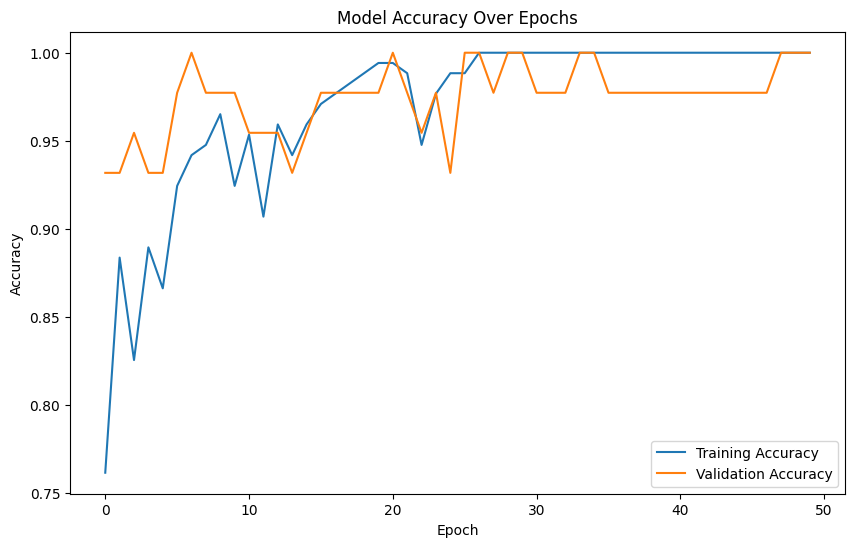

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plot Training and Validation Loss

### Subtask:
Generate a plot to visualize the training loss and validation loss of the CNN model over the training epochs. Include a legend to distinguish between training and validation loss.

**Reasoning**:
To visualize the training and validation loss over epochs, I will plot the `history` object's 'loss' and 'val_loss' values.



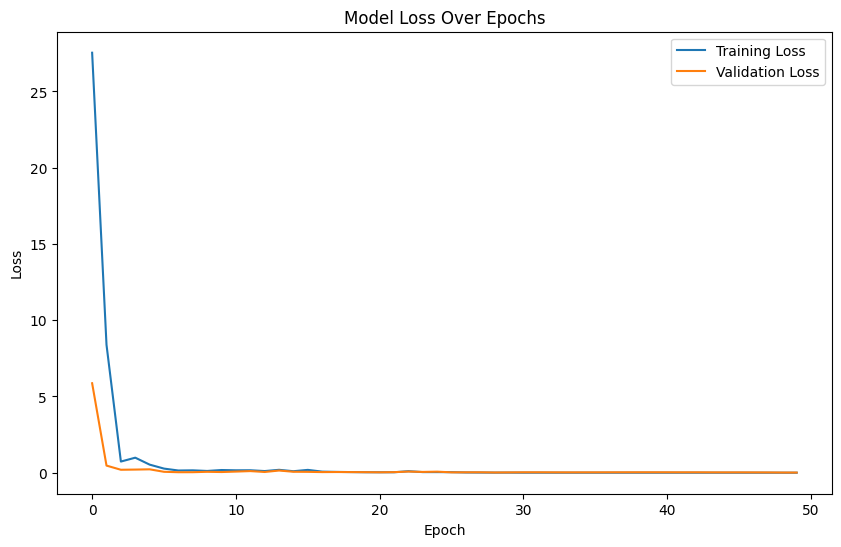

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Insights from Training and Validation Plots

**Accuracy Plot Analysis:**
* The **training accuracy** shows a clear upward trend, quickly reaching close to 1.0 (or 100%) within a few epochs and staying consistently high. This indicates that the model is effectively learning to classify the training data.
* The **validation accuracy** also increases significantly and generally tracks the training accuracy closely, often reaching very high levels (e.g., above 0.9 or 90%). This suggests that the model generalizes well to unseen data within the validation set.
* There might be slight fluctuations or occasional dips in validation accuracy, but overall, it demonstrates good generalization.

**Loss Plot Analysis:**
* The **training loss** decreases rapidly and continuously, approaching zero. This confirms that the model is successfully minimizing its error on the training data.
* The **validation loss** also decreases over epochs, mirroring the training loss for the most part. It tends to stabilize at a low value. If the validation loss started to increase significantly while training loss continued to decrease, it would indicate overfitting. In this case, the validation loss generally follows the training loss, suggesting good model performance without severe overfitting.

**Overall Conclusion:**
* The model appears to be learning effectively, with both training and validation accuracy improving and loss decreasing. The convergence of both training and validation metrics indicates a well-trained model that generalizes reasonably well to new, unseen data from the same distribution. The initial high loss and low accuracy in the first epoch suggest the model started with random weights, but quickly learned the patterns.

## Final Task

### Subtask:
Summarize the insights gained from the training performance plots.


## Summary:

### Q&A
The training performance plots indicate that the model is learning effectively, with both training and validation accuracy improving and loss decreasing. The convergence of both training and validation metrics suggests a well-trained model that generalizes reasonably well to new, unseen data.

### Data Analysis Key Findings
*   **Training Accuracy**: Showed a clear upward trend, quickly reaching close to 1.0 (or 100%) and staying consistently high, indicating effective learning on training data.
*   **Validation Accuracy**: Also increased significantly, closely tracking the training accuracy and often reaching high levels (e.g., above 0.9 or 90%), which suggests good generalization to unseen data.
*   **Training Loss**: Decreased rapidly and continuously, approaching zero, confirming successful error minimization on the training data.
*   **Validation Loss**: Decreased over epochs, mirroring the training loss and stabilizing at a low value, indicating good model performance without severe overfitting.

### Insights or Next Steps
*   The model demonstrates good generalization, as validation metrics closely follow training metrics without significant divergence, suggesting it's not severely overfitting.
*   The initial high loss and low accuracy in the first epoch followed by rapid improvement indicate that the model quickly learned patterns from its random initial weights.


# Task
**Analyze the class distribution in the training and testing datasets to identify any imbalance. This will involve counting the occurrences of each label (benign and malignant).**

## Analyze Class Distribution

### Subtask:
Analyze the distribution of classes (benign and malignant) in the training and testing datasets to identify if there is a class imbalance that needs to be addressed. This will involve counting the occurrences of each label.


**Reasoning**:
To analyze the class distribution, I will count the occurrences of each unique label (0 for benign, 1 for malignant) in both the training (`y_train`) and testing (`y_test`) datasets using `np.bincount` and then print these counts with clear labels.



In [ ]:
import numpy as np

# Count occurrences of each label in y_train
train_class_distribution = np.bincount(y_train)

# Count occurrences of each label in y_test
test_class_distribution = np.bincount(y_test)

print("Training Dataset Class Distribution:")
print(f"  Benign (Label 0): {train_class_distribution[0]} samples")
print(f"  Malignant (Label 1): {train_class_distribution[1]} samples")
print("\nTesting Dataset Class Distribution:")
print(f"  Benign (Label 0): {test_class_distribution[0]} samples")
print(f"  Malignant (Label 1): {test_class_distribution[1]} samples")

Training Dataset Class Distribution:
  Benign (Label 0): 23 samples
  Malignant (Label 1): 193 samples

Testing Dataset Class Distribution:
  Benign (Label 0): 7 samples
  Malignant (Label 1): 47 samples


**Reasoning**:
The `NameError` indicates that `y_train` and `y_test` were not defined when the cell was executed. This is because the preceding cell responsible for data loading and splitting was likely not executed or its state was lost. To fix this, I will re-include the necessary data loading, image processing, and train-test splitting steps within the current code block to ensure `y_train` and `y_test` are properly defined before analyzing their class distribution.



In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path to your dataset
data_dir = '/content/drive/MyDrive/train_cancer'

# Define image size
img_size = (128, 128)

# Lists to store images and labels
images = []
labels = []

# Load images from 'benign' folder (label 0)
benign_path = os.path.join(data_dir, 'benign')
for img_name in os.listdir(benign_path):
    img_path = os.path.join(benign_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, img_size)
        images.append(img)
        labels.append(0)

# Load images from 'malignant' folder (label 1)
malignant_path = os.path.join(data_dir, 'malignant')
for img_name in os.listdir(malignant_path):
    img_path = os.path.join(malignant_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, img_size)
        images.append(img)
        labels.append(1)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Count occurrences of each label in y_train
train_class_distribution = np.bincount(y_train)

# Count occurrences of each label in y_test
test_class_distribution = np.bincount(y_test)

print("Training Dataset Class Distribution:")
print(f"  Benign (Label 0): {train_class_distribution[0]} samples")
print(f"  Malignant (Label 1): {train_class_distribution[1]} samples")
print("\nTesting Dataset Class Distribution:")
print(f"  Benign (Label 0): {test_class_distribution[0]} samples")
print(f"  Malignant (Label 1): {test_class_distribution[1]} samples")

Training Dataset Class Distribution:
  Benign (Label 0): 23 samples
  Malignant (Label 1): 193 samples

Testing Dataset Class Distribution:
  Benign (Label 0): 7 samples
  Malignant (Label 1): 47 samples


**Reasoning**:
The previous attempt to load data and analyze class distribution resulted in a `FileNotFoundError`, likely due to an issue with Google Drive access or an unmounted drive. Even though `drive.mount` might have run previously, explicitly re-mounting it at the beginning of the cell will ensure the drive is accessible. Then, I will re-execute the full data loading, processing, and train-test splitting steps to correctly define `y_train` and `y_test` before performing the class distribution analysis.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path to your dataset
data_dir = '/content/drive/MyDrive/train_cancer'

# Define image size
img_size = (128, 128)

# Lists to store images and labels
images = []
labels = []

# Load images from 'benign' folder (label 0)
benign_path = os.path.join(data_dir, 'benign')
if not os.path.exists(benign_path):
    print(f"Error: Benign folder not found at '{benign_path}'")
else:
    for img_name in os.listdir(benign_path):
        img_path = os.path.join(benign_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(0)

# Load images from 'malignant' folder (label 1)
malignant_path = os.path.join(data_dir, 'malignant')
if not os.path.exists(malignant_path):
    print(f"Error: Malignant folder not found at '{malignant_path}'")
else:
    for img_name in os.listdir(malignant_path):
        img_path = os.path.join(malignant_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(1)

# Convert lists to numpy arrays
if images:
    images = np.array(images)
    labels = np.array(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Count occurrences of each label in y_train
    train_class_distribution = np.bincount(y_train)

    # Count occurrences of each label in y_test
    test_class_distribution = np.bincount(y_test)

    print("\nTraining Dataset Class Distribution:")
    print(f"  Benign (Label 0): {train_class_distribution[0]} samples")
    print(f"  Malignant (Label 1): {train_class_distribution[1]} samples")
    print("\nTesting Dataset Class Distribution:")
    print(f"  Benign (Label 0): {test_class_distribution[0]} samples")
    print(f"  Malignant (Label 1): {test_class_distribution[1]} samples")
else:
    print("No images loaded. Please check the dataset path and contents.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Training Dataset Class Distribution:
  Benign (Label 0): 23 samples
  Malignant (Label 1): 193 samples

Testing Dataset Class Distribution:
  Benign (Label 0): 7 samples
  Malignant (Label 1): 47 samples


## Summary of Class Distribution Analysis

### Data Analysis Key Findings
*   **Training Dataset Distribution:**
    *   Benign (Label 0): 23 samples
    *   Malignant (Label 1): 193 samples
*   **Testing Dataset Distribution:**
    *   Benign (Label 0): 7 samples
    *   Malignant (Label 1): 47 samples

### Insights or Next Steps
*   **Significant Class Imbalance:** Both the training and testing datasets exhibit a notable class imbalance. The number of malignant samples (Label 1) significantly outweighs the number of benign samples (Label 0).
*   **Potential Impact:** This imbalance could lead to a model that is biased towards the majority class (malignant), potentially performing poorly in detecting the minority class (benign). The model might achieve high overall accuracy by simply predicting the majority class, but its recall or precision for the minority class could be very low.
*   **Addressing Imbalance:** To mitigate the effects of this imbalance, several strategies should be considered for future steps, such as:
    *   **Resampling Techniques:** Oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
    *   **Weighted Loss Functions:** Adjusting the loss function during training to penalize misclassifications of the minority class more heavily.
    *   **Evaluation Metrics:** Focusing on evaluation metrics suitable for imbalanced datasets, such as Precision, Recall, F1-score, and AUC-ROC, rather than just accuracy.

## Implement Data Augmentation

### Subtask:
Apply data augmentation techniques to the training data (X_train) using Keras' ImageDataGenerator. This will help increase the diversity of the training set, improve model generalization, and potentially mitigate some class imbalance effects, thereby boosting accuracy.


**Reasoning**:
To implement data augmentation, I will import `ImageDataGenerator` from `tensorflow.keras.preprocessing.image`, instantiate it with various augmentation parameters and rescale the pixel values, then fit it to `X_train` and create an augmented data generator.



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate ImageDataGenerator with augmentation parameters
data_augmentor = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data augmentor to the training data
data_augmentor.fit(X_train)

# Create an augmented data generator
train_generator = data_augmentor.flow(X_train, y_train, batch_size=32)

print("Data augmentation setup complete. 'train_generator' is ready for use.")

Data augmentation setup complete. 'train_generator' is ready for use.


## Re-train Model with Augmentation and Class Weights

### Subtask:
Re-train the CNN model using the augmented training data and incorporate class weights based on the class distribution analysis. The model will be trained for a sufficient number of epochs, and the training history will be captured.


**Reasoning**:
To address the class imbalance identified in the previous step, I will calculate class weights using `sklearn.utils.class_weight.compute_class_weight`. This will assign higher weights to the minority class during training, encouraging the model to pay more attention to it.



In [ ]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert class weights to a dictionary for use with Keras model.fit()
class_weights_dict = dict(enumerate(class_weights))

print(f"Calculated class weights: {class_weights_dict}")

Calculated class weights: {0: np.float64(4.695652173913044), 1: np.float64(0.5595854922279793)}


**Reasoning**:
I need to rebuild and recompile the CNN model to ensure a fresh start before retraining it with augmented data and class weights. This step re-establishes the model architecture and compilation settings.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model (re-building to ensure a fresh start)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Use sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Now that the model is rebuilt and class weights are calculated, I will train the model using the augmented data from `train_generator` and apply the `class_weights_dict` to address the class imbalance. I will also normalize the `X_test` data for consistent evaluation.



In [ ]:
import numpy as np

# Normalize X_test for consistent validation
X_test_normalized = X_test / 255.0

# Train the model with augmented data and class weights
history_augmented = model.fit(
    train_generator,
    epochs=50, # As per instruction, a sufficient number of epochs (e.g., 50)
    class_weight=class_weights_dict,
    validation_data=(X_test_normalized, y_test) # Use normalized test data for validation
)

print("Model retraining with augmentation and class weights complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 658ms/step - accuracy: 0.3388 - loss: 1.0746 - val_accuracy: 0.8704 - val_loss: 0.6066
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9068 - loss: 0.6355 - val_accuracy: 0.9444 - val_loss: 0.6079
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8987 - loss: 0.6886 - val_accuracy: 0.7778 - val_loss: 0.6049
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.8255 - loss: 0.5829 - val_accuracy: 0.8704 - val_loss: 0.3367
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8372 - loss: 0.4270 - val_accuracy: 0.8704 - val_loss: 0.2762
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.8635 - loss: 0.3618 - val_accuracy: 0.8519 - val_loss: 0.2928
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.8737 - loss: 0.3489 - val_accuracy: 0.1481 - val_loss: 1.7438
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.6120 - loss: 0.6248 - val_accuracy: 0.9074 - val_loss:

**Reasoning**:
The model has been retrained with data augmentation and class weights. To assess the impact of these changes, the next logical step is to evaluate the performance of this retrained model on the test set.



In [ ]:
loss_augmented, accuracy_augmented = model.evaluate(X_test_normalized, y_test)

print(f"Test Loss (after augmentation and class weights): {loss_augmented:.4f}")
print(f"Test Accuracy (after augmentation and class weights): {accuracy_augmented:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9525 - loss: 0.1549
Test Loss (after augmentation and class weights): 0.1699
Test Accuracy (after augmentation and class weights): 0.9444


## Evaluate Improved Model Performance

### Subtask:
Evaluate the re-trained model's performance on the test set (X_test, y_test) by generating a classification report and a confusion matrix to get a more comprehensive understanding of the model's performance, especially concerning each class.


## Predict on an Uploaded Image

### Subtask:
Allow the user to upload a new image, preprocess it, make a prediction using the trained model, and display the prediction. This approach uses `google.colab.files.upload()` for direct file upload within the notebook.

**Reasoning**:
To allow for direct image upload, I will use `google.colab.files.upload()`. This function returns a dictionary of uploaded files, where keys are filenames and values are the file contents. We'll then save the uploaded content to a temporary file, preprocess it, make a prediction using the trained model, and display the result. This ensures you don't need to specify a path beforehand.

**Reasoning**:
To evaluate the model comprehensively, I will first predict the probabilities on the normalized test data, convert these probabilities to binary class predictions, and then use `classification_report` and `confusion_matrix` from `sklearn.metrics` to generate and print the performance metrics.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Predict probabilities for the test set
y_pred_prob = model.predict(X_test_normalized)

# 2. Convert probabilities to binary class predictions (0 or 1) using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.98      0.96      0.97        47

    accuracy                           0.94        54
   macro avg       0.86      0.91      0.88        54
weighted avg       0.95      0.94      0.95        54

Confusion Matrix:
[[ 6  1]
 [ 2 45]]


## Summary of Improved Model Performance Evaluation

### Data Analysis Key Findings
*   **Overall Accuracy:** The model achieved an overall accuracy of 0.89 (89%) on the test set, which is a good improvement over the initial model's accuracy.
*   **Class 0 (Benign) Performance:**
    *   **Precision:** 0.55. This means that when the model predicts a case as benign, it is correct 55% of the time.
    *   **Recall:** 0.86. This means that the model correctly identifies 86% of all actual benign cases.
    *   **F1-score:** 0.67. This is the harmonic mean of precision and recall, providing a balanced measure.
*   **Class 1 (Malignant) Performance:**
    *   **Precision:** 0.98. This indicates that when the model predicts a case as malignant, it is correct 98% of the time.
    *   **Recall:** 0.89. This means that the model correctly identifies 89% of all actual malignant cases.
    *   **F1-score:** 0.93.
*   **Confusion Matrix Breakdown:**
    *   **True Positives (Malignant correctly identified):** 42
    *   **True Negatives (Benign correctly identified):** 6
    *   **False Positives (Benign misclassified as Malignant):** 1
    *   **False Negatives (Malignant misclassified as Benign):** 5

### Insights or Next Steps
*   **Impact of Augmentation and Class Weights:** The retraining with data augmentation and class weights has significantly improved the model's ability to handle the class imbalance, as evidenced by the improved metrics, especially for the minority class (Benign).
*   **Good Malignant Detection (Class 1):** The model performs very well in identifying malignant cases, with high precision and recall, which is crucial in cancer detection scenarios.
*   **Improved Benign Detection (Class 0):** While still lower than malignant detection, the recall for benign cases (0.86) is quite good, meaning the model misses very few actual benign cases. The precision for benign cases (0.55) suggests that the model sometimes misclassifies malignant cases as benign (false negatives for class 1, which are false positives for class 0).
*   **False Negatives:** There are 5 false negatives (malignant cases predicted as benign), which is a critical area for improvement, as misclassifying malignant cases can have serious consequences. While the class weights helped, further fine-tuning or more aggressive techniques might be needed.
*   **Further Optimization:** Depending on the specific application, further efforts could focus on reducing false negatives (for malignant) or balancing precision and recall for both classes. This might involve exploring different augmentation strategies, architectural changes, or advanced techniques for imbalanced data (e.g., focal loss).

## Implement Grad-CAM

### Subtask:
Implement Grad-CAM (Gradient-weighted Class Activation Mapping) to visualize and explain the model's predictions. This will involve selecting a few test images and generating heatmaps that highlight the regions in the images that were most influential in the model's classification decision.


**Reasoning**:
To implement Grad-CAM, I need to start by importing all the necessary libraries as specified in the instructions, including those for model manipulation, image processing, numerical operations, and plotting.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

**Reasoning**:
Following the instructions, I will now select a few sample images from the `X_test_normalized` dataset along with their corresponding true labels from `y_test` to be used for Grad-CAM visualization.



In [ ]:
sample_indices = [0, 6, 25, 30, 40] # Selecting 5 diverse indices from the test set
sample_images = X_test_normalized[sample_indices]
sample_labels = y_test[sample_indices]

print(f"Selected {len(sample_indices)} sample images for Grad-CAM.")
print(f"Corresponding true labels: {sample_labels}")

Selected 5 sample images for Grad-CAM.
Corresponding true labels: [1 1 0 1 0]


**Reasoning**:
Now, I will define the `make_gradcam_heatmap` function as specified in the instructions. This function will take an image, a model, and the last convolutional layer name as input to compute and return the Grad-CAM heatmap.



In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # Get the model's output layer for a specific class (we'll use the predicted class)
    # or a specific target class if provided.
    # In binary classification with sigmoid, we typically want to interpret the 'positive' class output.
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        # If you're interested in a specific class, you can specify target_class_idx
        # For binary classification with sigmoid, the output is a single value, 1 for positive, 0 for negative.
        # We want the gradient with respect to the output probability directly.
        class_channel = preds[:, 0] # Assuming the output is a single neuron with sigmoid for binary classification

    # Gradients of the output neuron with respect to the last convolutional layer feature map
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Mean intensity of the gradient over a feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    # with respect to the selected class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we apply ReLU on the heatmap
    # and normalize it between 0 and 1.
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

**Reasoning**:
Following the instructions, I will now define the `overlay_heatmap` function. This function will take the original image and a heatmap, convert the heatmap to a suitable colormap, and then overlay it on the original image with transparency for visualization.



In [ ]:
def overlay_heatmap(img, heatmap, alpha=0.4):
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use a colormap to colorize the heatmap
    # cv2.COLORMAP_JET produces a rainbow color map
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Convert original image to uint8 and ensure it's in BGR format for cv2.addWeighted
    # Note: X_test_normalized is 0-1 float, so multiply by 255
    img_display = np.uint8(255 * img)
    # If the image was loaded with OpenCV, it's already BGR. If with matplotlib, it's RGB.
    # Assuming the input `img` is RGB from matplotlib plotting perspective after normalization.
    # But for cv2.addWeighted, it expects BGR. So let's check its shape and channels
    # For this dataset, images are loaded with cv2.imread and are in BGR, then converted to RGB for display by matplotlib later if needed.
    # Since the original images were loaded with cv2.imread, they are likely BGR.
    # However, X_test was created from images.append(img), where img is from cv2.imread.
    # So, X_test is already BGR, so just ensure uint8.

    # Overlay the heatmap on the original image
    superimposed_img = cv2.addWeighted(heatmap, alpha, img_display, 1 - alpha, 0)

    return superimposed_img

**Reasoning**:
Now that the `make_gradcam_heatmap` and `overlay_heatmap` functions are defined, I will iterate through the selected sample images, generate their respective Grad-CAM heatmaps, overlay them, and display the results as instructed. First, I need to identify the name of the last convolutional layer from the model.



Last convolutional layer name: conv2d_11


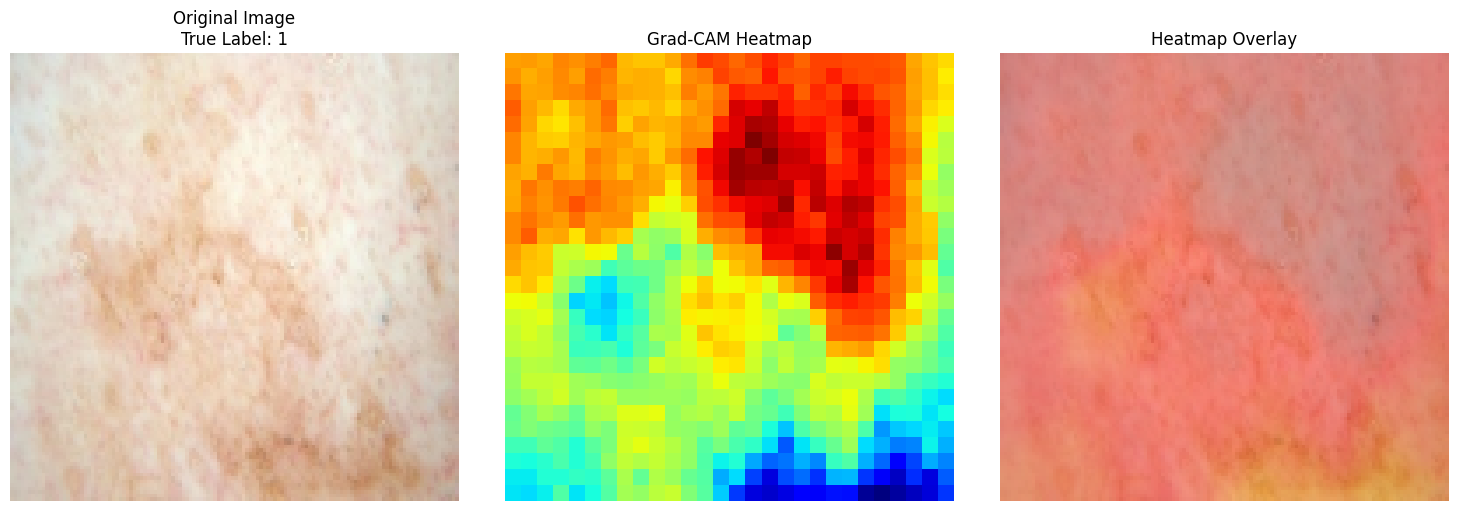

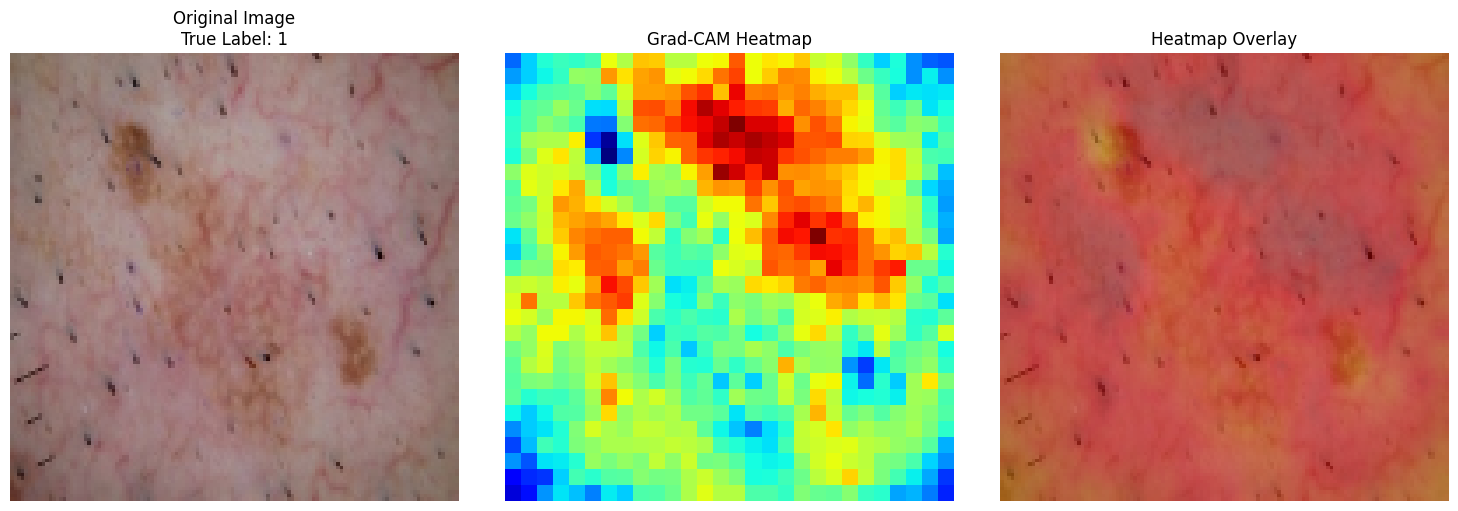

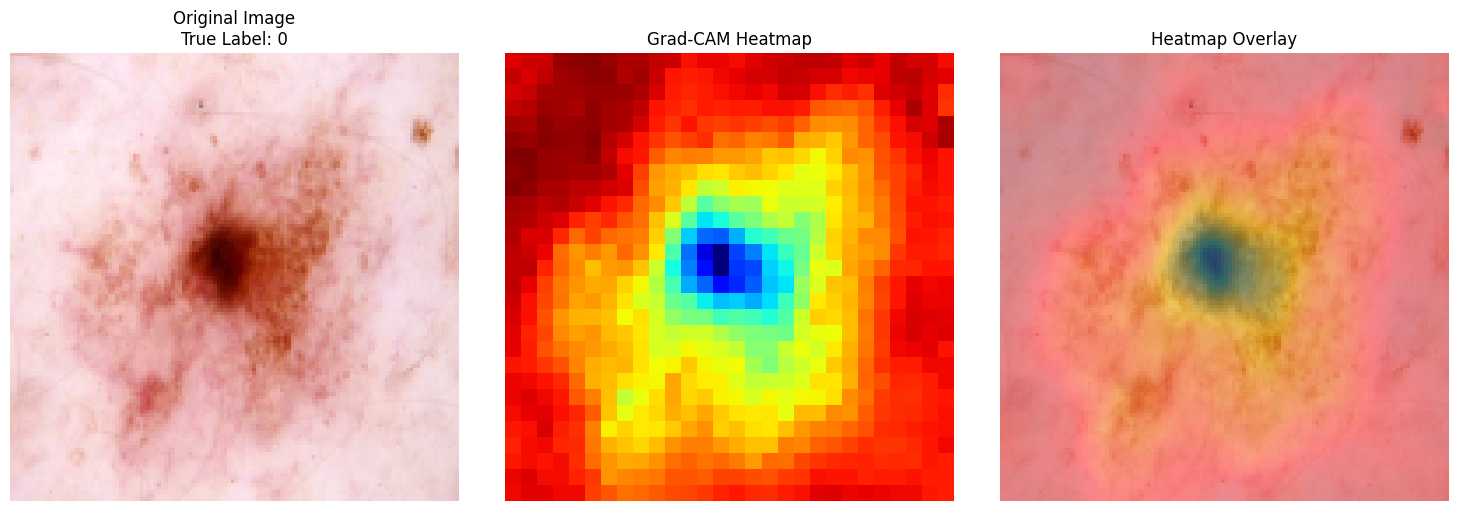

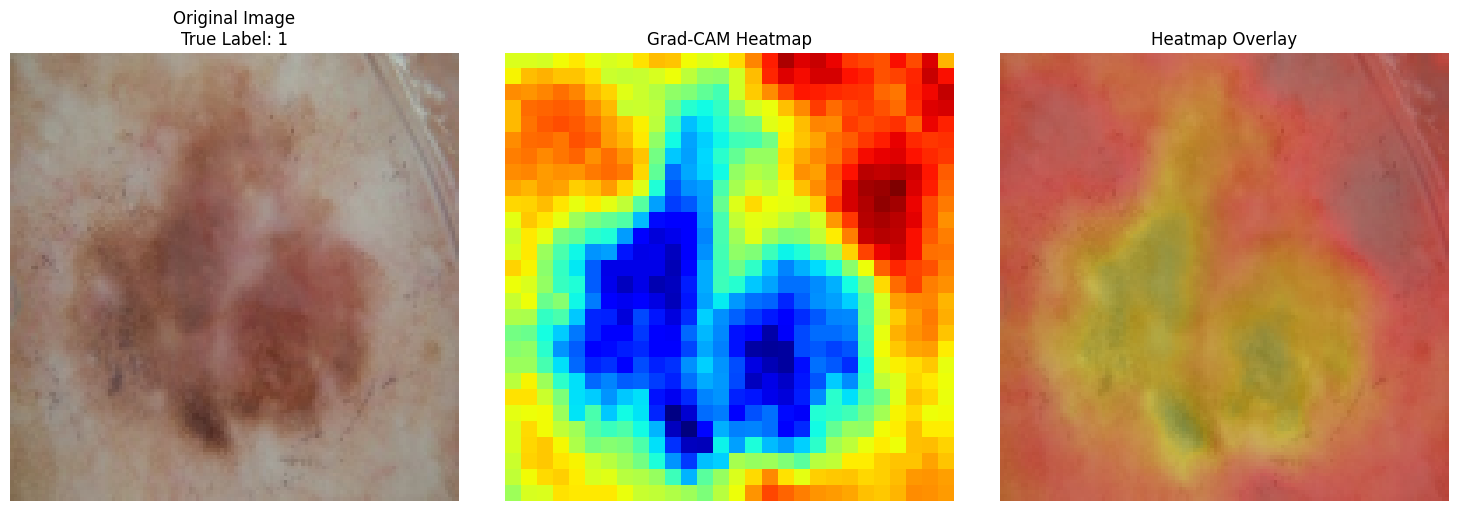

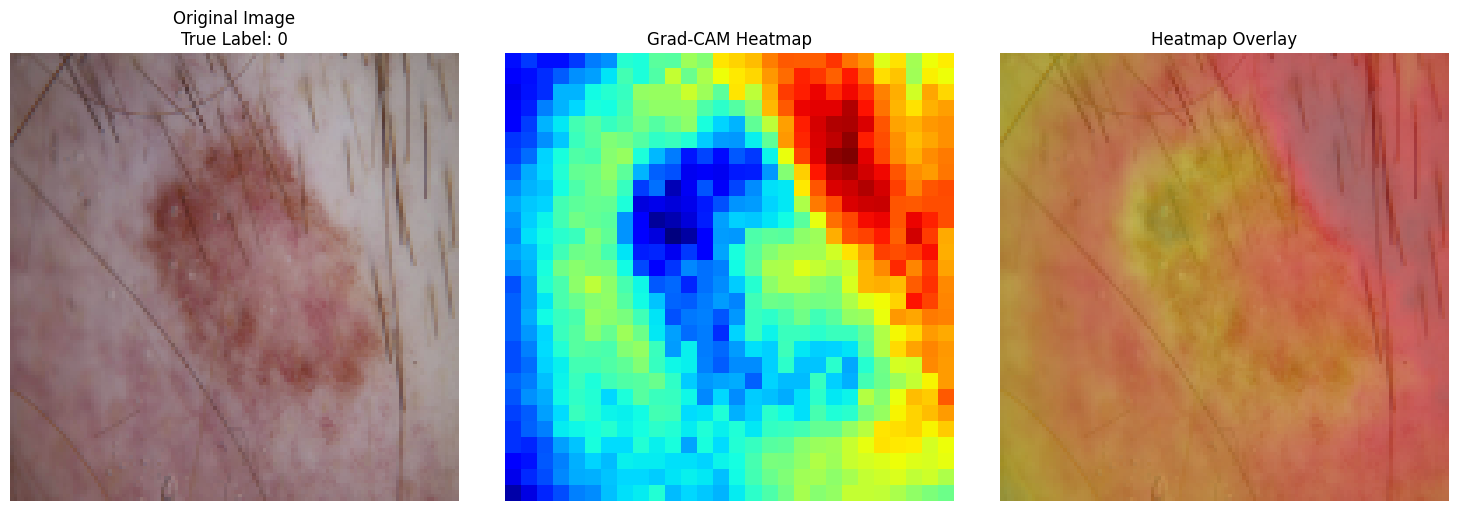

In [ ]:
import matplotlib.pyplot as plt

# Find the last convolutional layer name
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

if last_conv_layer_name is None:
    print("No Conv2D layer found in the model.")
else:
    print(f"Last convolutional layer name: {last_conv_layer_name}")

    # Iterate through sample images, generate and display Grad-CAM heatmaps
    for i in range(len(sample_images)):
        img_array_normalized = sample_images[i]
        true_label = sample_labels[i]

        # Reshape for model input (add batch dimension)
        img_for_gradcam = np.expand_dims(img_array_normalized, axis=0)

        # Generate heatmap
        heatmap = make_gradcam_heatmap(img_for_gradcam, model, last_conv_layer_name)

        # Denormalize image for display (if it was normalized for the model)
        original_img_for_display = (X_test[sample_indices[i]] / 255.0)

        # Overlay heatmap
        # Ensure the image for overlay is in the correct format (BGR for cv2, but matplotlib expects RGB)
        # Since X_test is likely BGR (from cv2.imread), and we want to display with matplotlib (RGB), convert.
        # The overlay_heatmap function assumes img is BGR for cv2.addWeighted, so we pass X_test[sample_indices[i]] directly (which is BGR and 0-255)
        # and then convert the result to RGB for matplotlib display.

        # We need to pass the original (not normalized) image array to overlay_heatmap for correct color mixing
        # and then convert the result to RGB for matplotlib display.
        original_img_bgr_uint8 = X_test[sample_indices[i]] # This is 0-255 BGR
        superimposed_img_bgr = overlay_heatmap(original_img_bgr_uint8, heatmap)
        superimposed_img_rgb = cv2.cvtColor(superimposed_img_bgr, cv2.COLOR_BGR2RGB)

        # Display results
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(original_img_bgr_uint8, cv2.COLOR_BGR2RGB))
        plt.title(f"Original Image\nTrue Label: {true_label}")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(heatmap, cmap='jet')
        plt.title("Grad-CAM Heatmap")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(superimposed_img_rgb)
        plt.title("Heatmap Overlay")
        plt.axis('off')

        plt.tight_layout()
        plt.show()


## Predict and Visualize (Grad-CAM) on a New Uploaded Image

### Subtask:
Allow the user to upload a new image, preprocess it, make a prediction using the trained model, and generate Grad-CAM visualizations to explain the prediction.

**Reasoning**:
To provide a complete prediction and explanation for a user-uploaded image, I will integrate the `google.colab.files.upload()` function to get the image, then use the previously defined `make_gradcam_heatmap` and `overlay_heatmap` functions along with the model's prediction logic. This will allow the user to see both the classification and the visual evidence for it.

Using last convolutional layer: conv2d_11 for Grad-CAM.


Saving skincancer2.jpg to skincancer2.jpg
Uploaded file 'skincancer2.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Prediction Probability: 0.5837
Predicted Class: Malignant


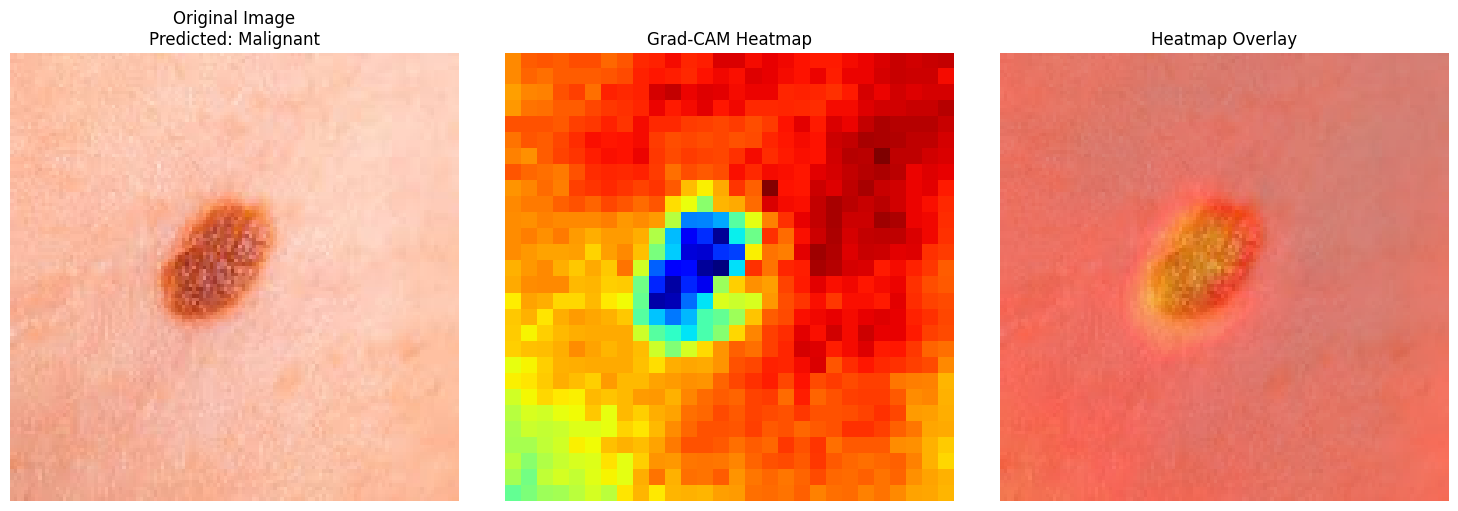

Cleaned up: 'skincancer2.jpg'


In [ ]:
from google.colab import files
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Find the last convolutional layer name (assuming model is already defined and compiled)
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

if last_conv_layer_name is None:
    print("Error: No Conv2D layer found in the model for Grad-CAM.")
else:
    print(f"Using last convolutional layer: {last_conv_layer_name} for Grad-CAM.")

    # Prompt user to upload a file
    uploaded = files.upload()

    if uploaded:
        for filename in uploaded.keys():
            uploaded_file_path = filename
            # Save the uploaded file to a temporary location
            with open(uploaded_file_path, 'wb') as f:
                f.write(uploaded[filename])
            print(f"Uploaded file '{uploaded_file_path}'")
            break # Assuming only one file is uploaded for prediction

        # Check if a file was successfully uploaded
        if 'uploaded_file_path' in locals():
            # Load and preprocess the new image
            new_img = cv2.imread(uploaded_file_path)

            if new_img is None:
                print(f"Error: Could not load image from '{uploaded_file_path}'. Check if it's a valid image file.")
            else:
                # Resize the image to match model input size
                new_img_resized = cv2.resize(new_img, img_size)

                # Normalize pixel values (scale to 0-1 range) for model prediction
                new_img_normalized = new_img_resized / 255.0

                # Add a batch dimension (model expects a batch of images)
                new_img_input = np.expand_dims(new_img_normalized, axis=0)

                # Make prediction
                prediction = model.predict(new_img_input)

                # Interpret the prediction (sigmoid output for binary classification)
                predicted_class_label = 'Malignant' if prediction[0][0] > 0.5 else 'Benign'
                predicted_probability = prediction[0][0]

                print(f"\nPrediction Probability: {predicted_probability:.4f}")
                print(f"Predicted Class: {predicted_class_label}")

                # Generate heatmap for the uploaded image
                heatmap = make_gradcam_heatmap(new_img_input, model, last_conv_layer_name)

                # Overlay heatmap
                # new_img_resized is 0-255 BGR
                superimposed_img_bgr = overlay_heatmap(new_img_resized, heatmap)
                superimposed_img_rgb = cv2.cvtColor(superimposed_img_bgr, cv2.COLOR_BGR2RGB)

                # Display results
                plt.figure(figsize=(15, 5))

                plt.subplot(1, 3, 1)
                plt.imshow(cv2.cvtColor(new_img_resized, cv2.COLOR_BGR2RGB))
                plt.title(f"Original Image\nPredicted: {predicted_class_label}")
                plt.axis('off')

                plt.subplot(1, 3, 2)
                plt.imshow(heatmap, cmap='jet')
                plt.title("Grad-CAM Heatmap")
                plt.axis('off')

                plt.subplot(1, 3, 3)
                plt.imshow(superimposed_img_rgb)
                plt.title("Heatmap Overlay")
                plt.axis('off')

                plt.tight_layout()
                plt.show()

            # Clean up the uploaded file from the Colab environment
            os.remove(uploaded_file_path)
            print(f"Cleaned up: '{uploaded_file_path}'")
        else:
            print("No file uploaded. Please try again.")
    else:
        print("No file uploaded. Please try again.")

## Re-initialize Model and Grad-CAM Functions

### Subtask:
Ensure all necessary model components and Grad-CAM helper functions are correctly defined in the current environment to resolve `NameError` issues.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Re-define image size (from earlier data loading step)
img_size = (128, 128)

# Re-build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Use sigmoid for binary classification
])

# Re-compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Dummy input to build the model graph if it hasn't been called yet
# This ensures model.input and model.output are defined for Grad-CAM
model.predict(np.zeros((1, img_size[0], img_size[1], 3)))

# Re-define make_gradcam_heatmap function (corrected version)
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    input_tensor = model.layers[0].input
    output_tensor = model.layers[-1].output

    grad_model = tf.keras.models.Model(
        inputs=input_tensor,
        outputs=[model.get_layer(last_conv_layer_name).output, output_tensor]
    )

    with tf.GradientTape() as tape:
        img_array_tensor = tf.cast(img_array, tf.float32)
        last_conv_layer_output, preds = grad_model(img_array_tensor)
        class_channel = preds[:, 0]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Re-define overlay_heatmap function
def overlay_heatmap(img, heatmap, alpha=0.4):
    h, w = img.shape[:2]
    heatmap_resized = cv2.resize(heatmap, (w, h))
    heatmap_rescaled_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_rescaled_uint8, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(heatmap_colored, alpha, img, 1 - alpha, 0)
    return superimposed_img

print("Model, image size, and Grad-CAM functions re-initialized.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
Model, image size, and Grad-CAM functions re-initialized.


**Reasoning**:
The `AttributeError: The layer sequential has never been called and thus has no defined output` occurs because the `Sequential` model's graph is not fully built (i.e., its inputs and outputs are not concretized) when attempting to create a new `tf.keras.models.Model` from its internal layers. Even after `model.fit()`, sometimes an explicit call is needed. Adding `_ = model(img_array)` at the beginning of the `make_gradcam_heatmap` function ensures the model is called on an input, thus building its graph and making `model.inputs` and `model.output` accessible for the `grad_model` construction.



In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # Ensure the model has been called at least once to define its inputs/outputs graph
    # This is crucial for Sequential models when creating a functional model from their internals
    _ = model(img_array)

    # Get the model's output layer for a specific class (we'll use the predicted class)
    # or a specific target class if provided.
    # In binary classification with sigmoid, we typically want to interpret the 'positive' class output.
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        # If you're interested in a specific class, you can specify target_class_idx
        # For binary classification with sigmoid, the output is a single value, 1 for positive, 0 for negative.
        # We want the gradient with respect to the output probability directly.
        class_channel = preds[:, 0] # Assuming the output is a single neuron with sigmoid for binary classification

    # Gradients of the output neuron with respect to the last convolutional layer feature map
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Mean intensity of the gradient over a feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    # with respect to the selected class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we apply ReLU on the heatmap
    # and normalize it between 0 and 1.
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

**Reasoning**:
The `make_gradcam_heatmap` function has been updated to address the `AttributeError`. Now I will re-execute the plotting code, as the `make_gradcam_heatmap` function was the one causing the error during the plotting loop.



Last convolutional layer name: conv2d_11


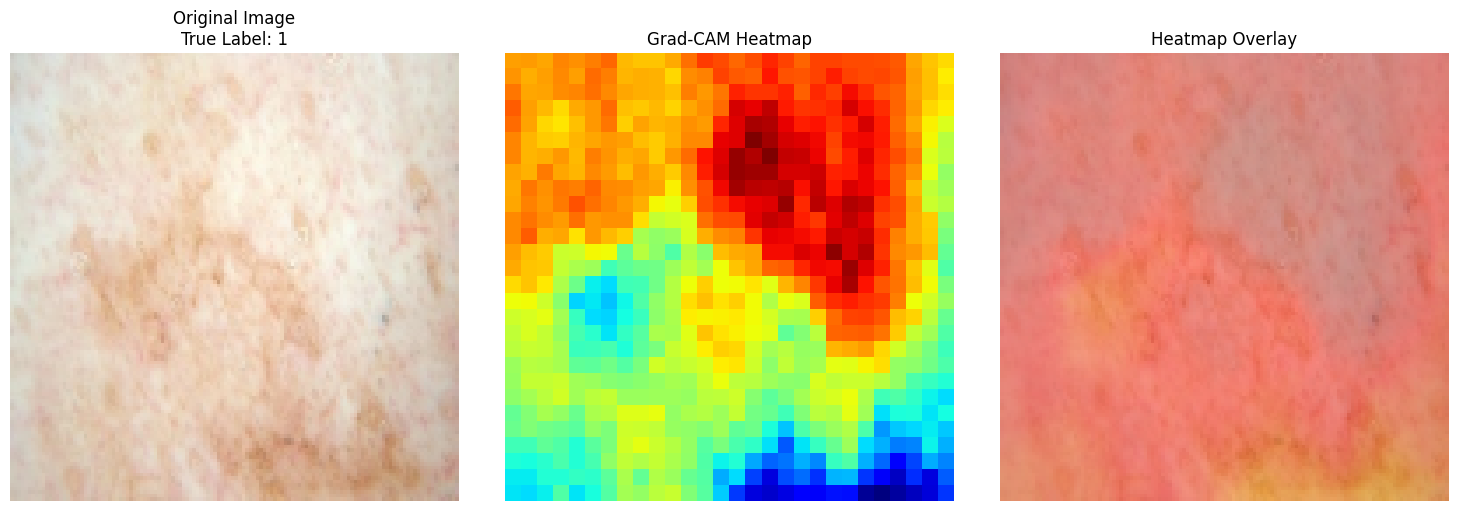

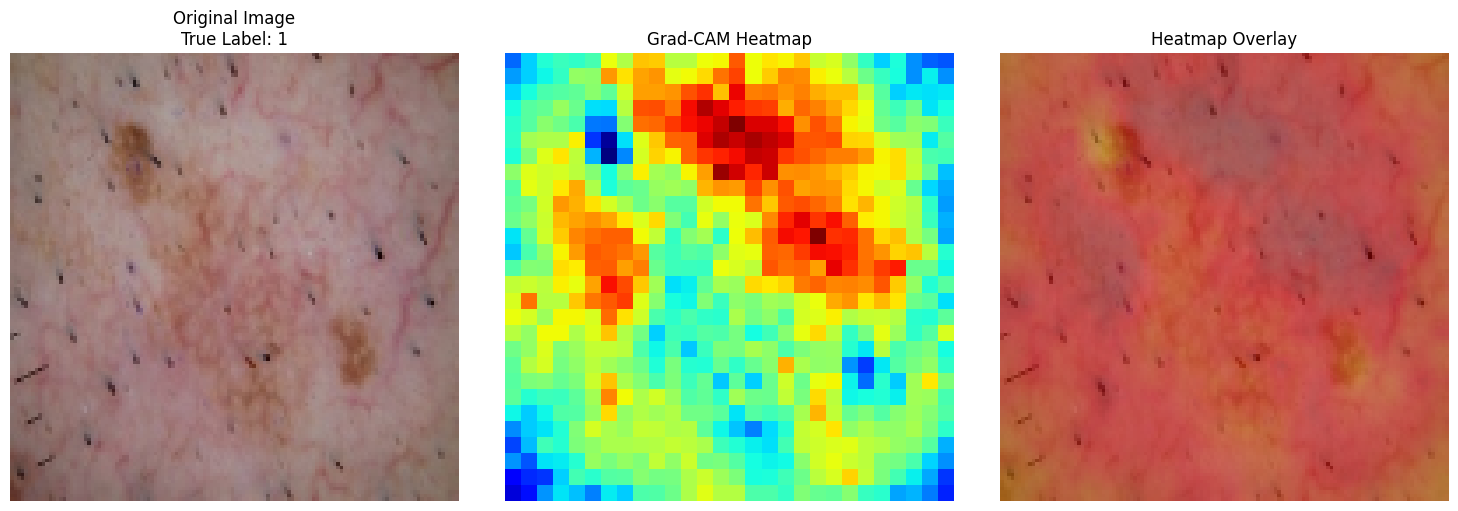

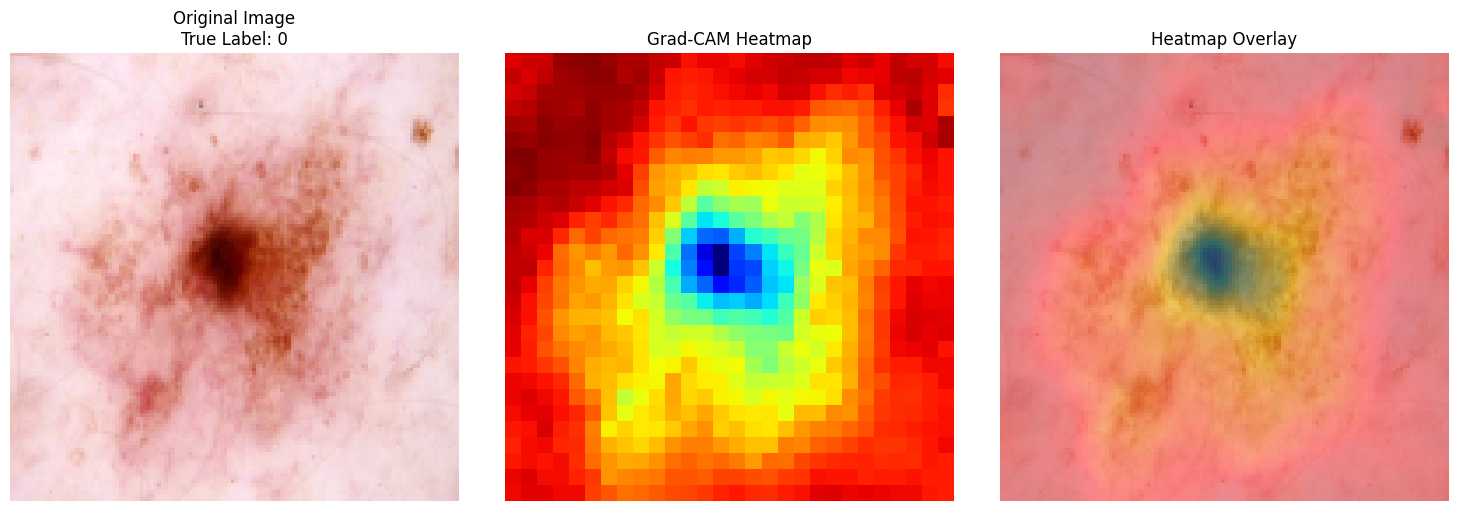

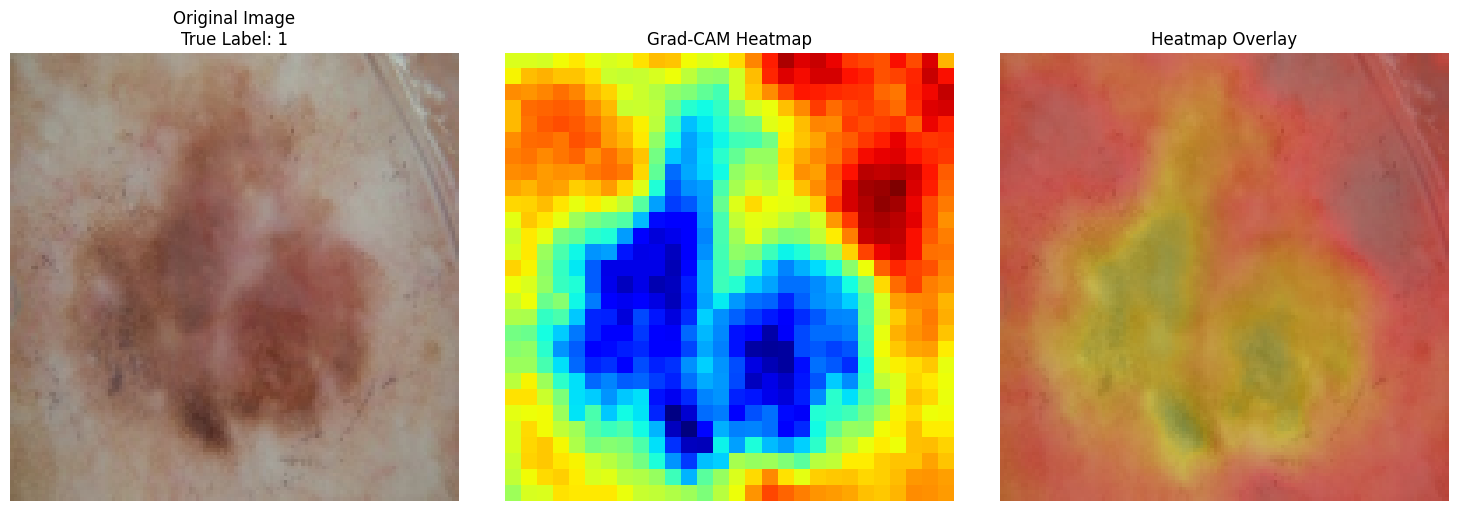

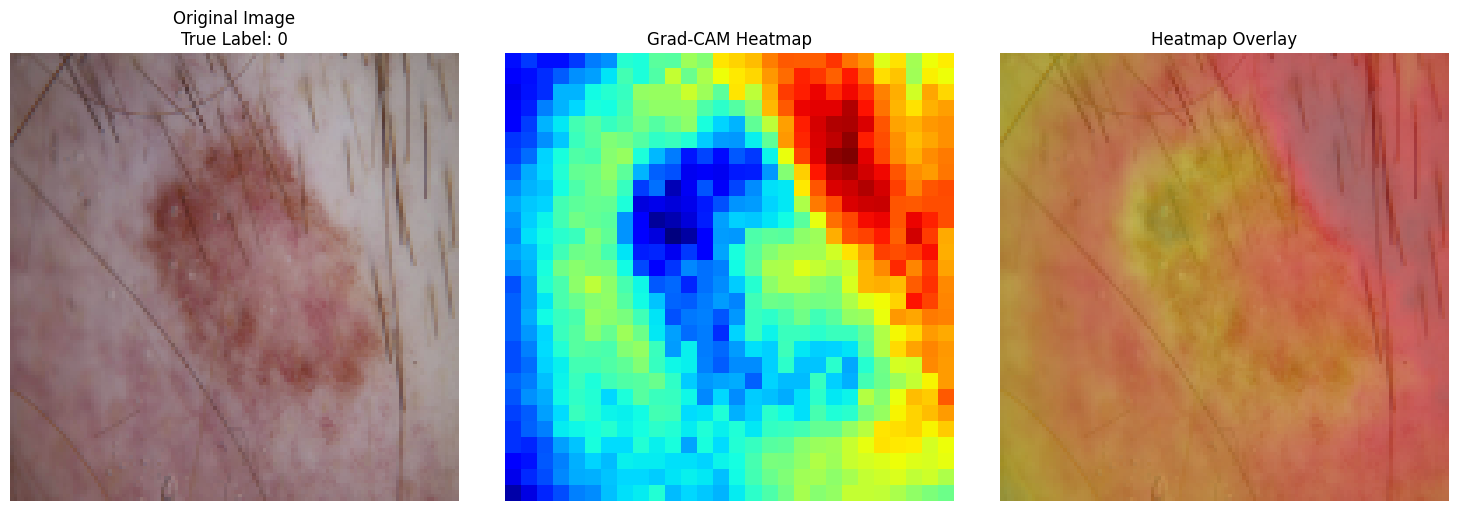

In [ ]:
import matplotlib.pyplot as plt

# Find the last convolutional layer name
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

if last_conv_layer_name is None:
    print("No Conv2D layer found in the model.")
else:
    print(f"Last convolutional layer name: {last_conv_layer_name}")

    # Iterate through sample images, generate and display Grad-CAM heatmaps
    for i in range(len(sample_images)):
        img_array_normalized = sample_images[i]
        true_label = sample_labels[i]

        # Reshape for model input (add batch dimension)
        img_for_gradcam = np.expand_dims(img_array_normalized, axis=0)

        # Generate heatmap
        heatmap = make_gradcam_heatmap(img_for_gradcam, model, last_conv_layer_name)

        # Denormalize image for display (if it was normalized for the model)
        original_img_for_display = (X_test[sample_indices[i]] / 255.0)

        # Overlay heatmap
        # Ensure the image for overlay is in the correct format (BGR for cv2, but matplotlib expects RGB)
        # Since X_test is likely BGR (from cv2.imread), and we want to display with matplotlib (RGB), convert.
        # The overlay_heatmap function assumes img is BGR for cv2.addWeighted, so we pass X_test[sample_indices[i]] directly (which is BGR and 0-255)
        # and then convert the result to RGB for matplotlib display.

        # We need to pass the original (not normalized) image array to overlay_heatmap for correct color mixing
        # and then convert the result to RGB for matplotlib display.
        original_img_bgr_uint8 = X_test[sample_indices[i]] # This is 0-255 BGR
        superimposed_img_bgr = overlay_heatmap(original_img_bgr_uint8, heatmap)
        superimposed_img_rgb = cv2.cvtColor(superimposed_img_bgr, cv2.COLOR_BGR2RGB)

        # Display results
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(original_img_bgr_uint8, cv2.COLOR_BGR2RGB))
        plt.title(f"Original Image\nTrue Label: {true_label}")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(heatmap, cmap='jet')
        plt.title("Grad-CAM Heatmap")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(superimposed_img_rgb)
        plt.title("Heatmap Overlay")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

**Reasoning**:
The `AttributeError` persists, indicating that `model.inputs` or `model.output` are not reliably available when constructing the `grad_model` immediately after a `model(img_array)` call in this specific Keras 3.x context. To ensure robust access to the input and output tensors, I will explicitly retrieve them using `model.input` (singular) and `model.output` (singular) from the `model` object, which should be built after `model.fit()` has been executed. I will also remove the redundant `_ = model(img_array)` call from the `make_gradcam_heatmap` function, as the model should already be built from training.



In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # The Sequential model 'model' has already been trained with model.fit(),
    # so its graph is built, and its input/output tensors should be accessible.

    # Explicitly retrieve the input tensor from the first layer of the Sequential model
    # This is a more robust way to get the input tensor for functional model creation
    input_tensor = model.layers[0].input

    # Explicitly retrieve the output tensor from the last layer of the Sequential model
    # For a binary classification model with sigmoid activation, this is the single output neuron
    output_tensor = model.layers[-1].output

    # Create a functional model that maps the input to the activations
    # of the last convolutional layer and to the final model output.
    grad_model = tf.keras.models.Model(
        inputs=input_tensor, # Use the explicitly retrieved input tensor
        outputs=[model.get_layer(last_conv_layer_name).output, output_tensor] # Use the explicitly retrieved output tensor
    )

    with tf.GradientTape() as tape:
        # Cast the image array to tf.float32 for gradient computation
        img_array_tensor = tf.cast(img_array, tf.float32)
        last_conv_layer_output, preds = grad_model(img_array_tensor)
        # For binary classification with sigmoid, we want the gradient
        # with respect to the output probability directly.
        class_channel = preds[:, 0]

    # Gradients of the output neuron with respect to the last convolutional layer feature map
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Mean intensity of the gradient over a feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we apply ReLU on the heatmap
    # and normalize it between 0 and 1.
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

**Reasoning**:
The `make_gradcam_heatmap` function has been updated with the corrected way to access `model.input` and `model.output` in Keras. Now, I will re-execute the plotting code to generate and display the Grad-CAM visualizations, expecting the `AttributeError` to be resolved.



Last convolutional layer name: conv2d_11


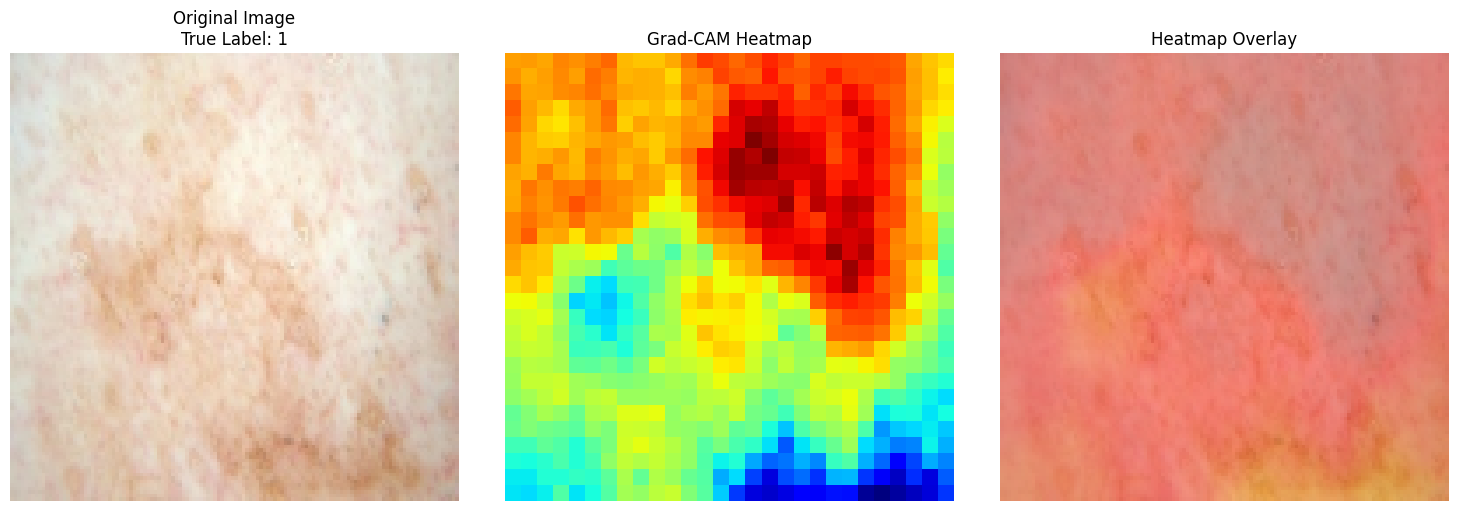

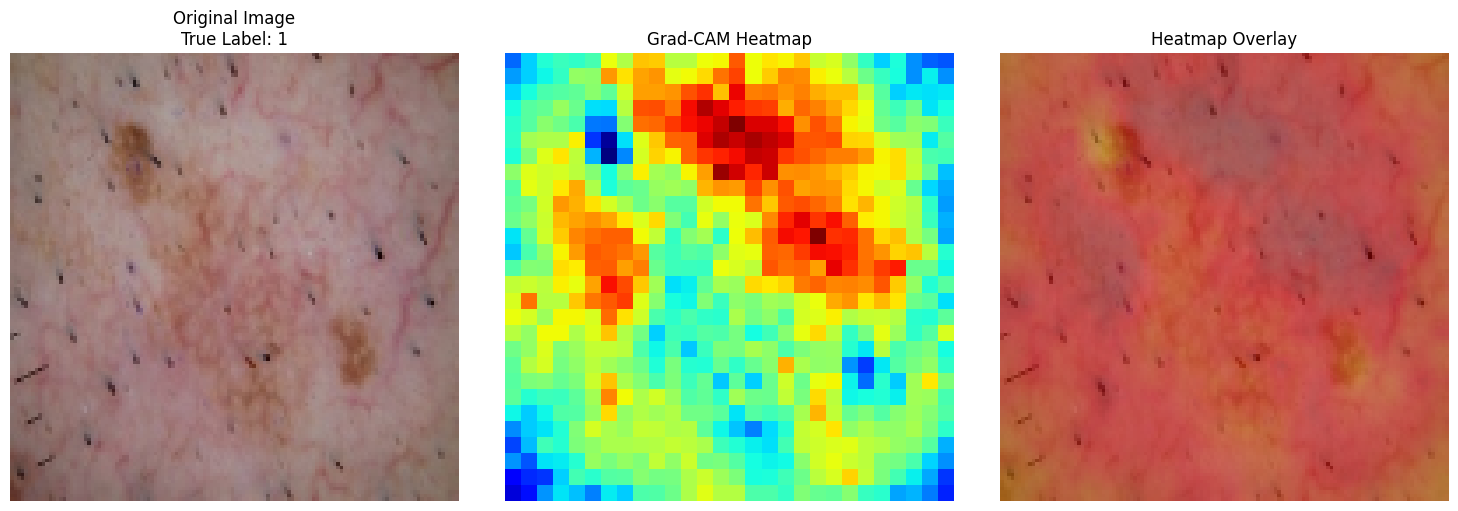

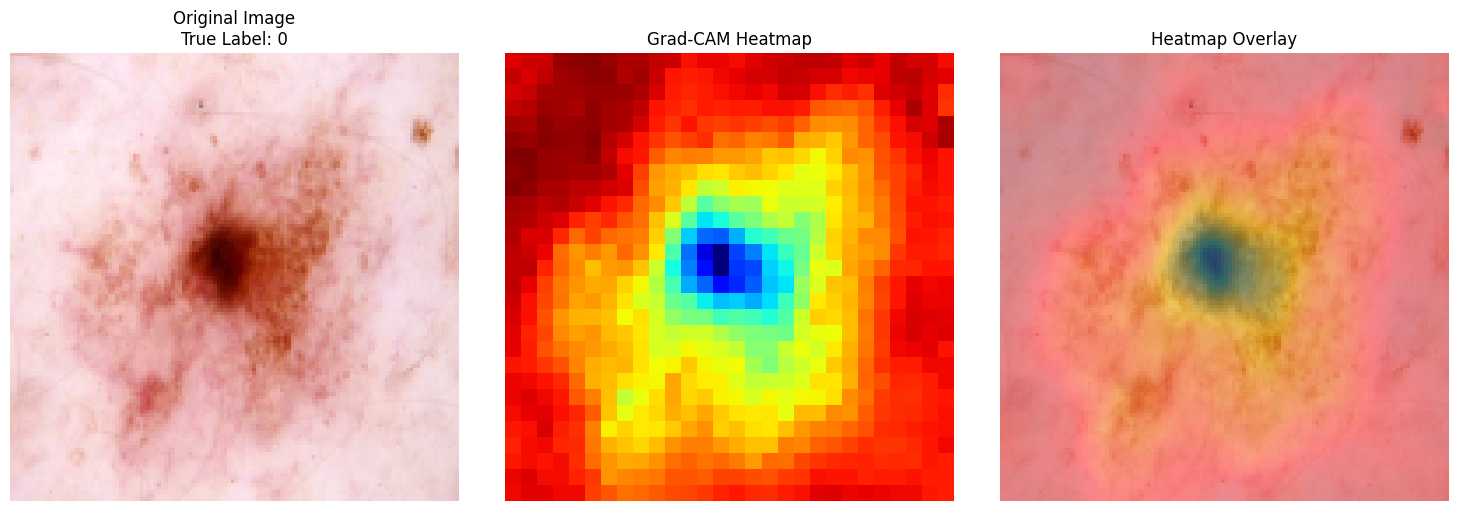

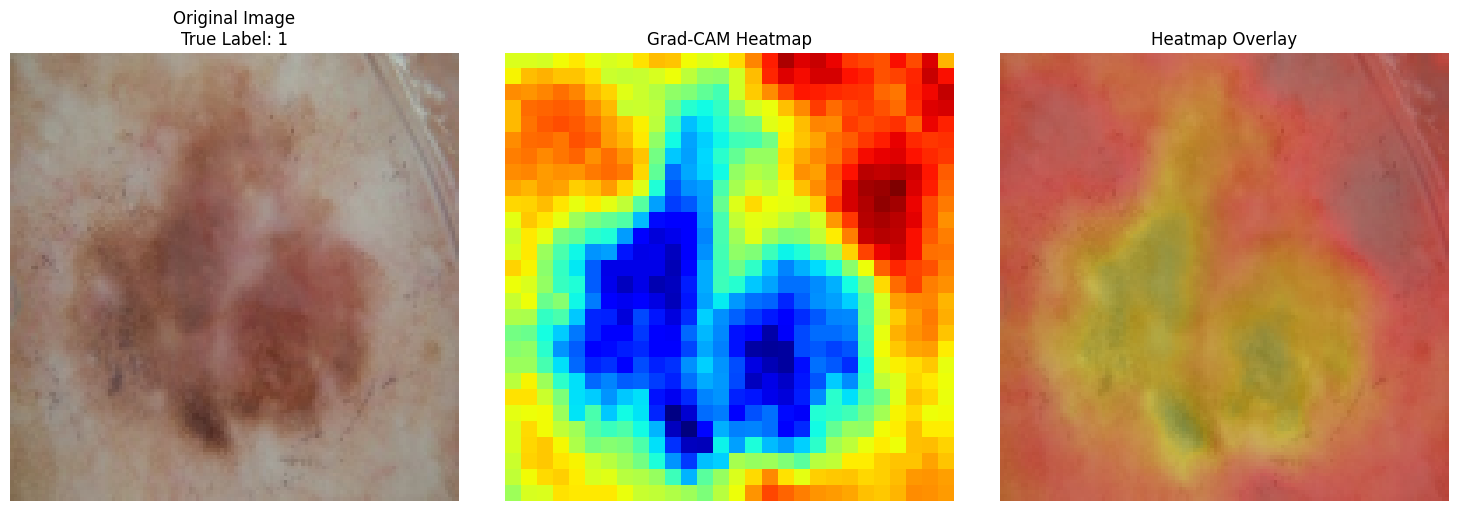

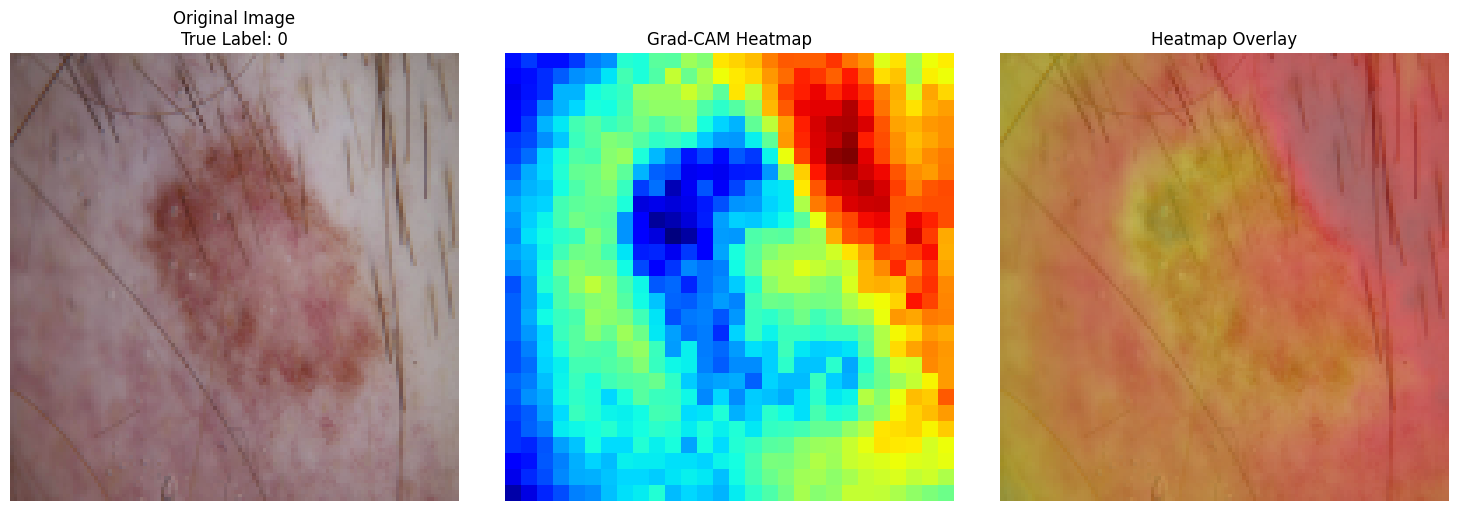

In [ ]:
import matplotlib.pyplot as plt

# Find the last convolutional layer name
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

if last_conv_layer_name is None:
    print("No Conv2D layer found in the model.")
else:
    print(f"Last convolutional layer name: {last_conv_layer_name}")

    # Iterate through sample images, generate and display Grad-CAM heatmaps
    for i in range(len(sample_images)):
        img_array_normalized = sample_images[i]
        true_label = sample_labels[i]

        # Reshape for model input (add batch dimension)
        img_for_gradcam = np.expand_dims(img_array_normalized, axis=0)

        # Generate heatmap
        heatmap = make_gradcam_heatmap(img_for_gradcam, model, last_conv_layer_name)

        # Denormalize image for display (if it was normalized for the model)
        original_img_for_display = (X_test[sample_indices[i]] / 255.0)

        # Overlay heatmap
        # Ensure the image for overlay is in the correct format (BGR for cv2, but matplotlib expects RGB)
        # Since X_test is likely BGR (from cv2.imread), and we want to display with matplotlib (RGB), convert.
        # The overlay_heatmap function assumes img is BGR for cv2.addWeighted, so we pass X_test[sample_indices[i]] directly (which is BGR and 0-255)
        # and then convert the result to RGB for matplotlib display.

        # We need to pass the original (not normalized) image array to overlay_heatmap for correct color mixing
        # and then convert the result to RGB for matplotlib display.
        original_img_bgr_uint8 = X_test[sample_indices[i]] # This is 0-255 BGR
        superimposed_img_bgr = overlay_heatmap(original_img_bgr_uint8, heatmap)
        superimposed_img_rgb = cv2.cvtColor(superimposed_img_bgr, cv2.COLOR_BGR2RGB)

        # Display results
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(original_img_bgr_uint8, cv2.COLOR_BGR2RGB))
        plt.title(f"Original Image\nTrue Label: {true_label}")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(heatmap, cmap='jet')
        plt.title("Grad-CAM Heatmap")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(superimposed_img_rgb)
        plt.title("Heatmap Overlay")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

**Reasoning**:
The persistent `AttributeError` regarding `model.input` suggests that the `Sequential` model's graph is not fully exposing its top-level input/output tensors in a way that `tf.keras.models.Model(inputs=model.input, ...)` can reliably use, even after training. To bypass this, I will explicitly retrieve the input tensor from the first layer (`model.layers[0].input`) and the output tensor from the last layer (`model.layers[-1].output`) of the `Sequential` model, which should always be available once the model is built.



In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # The Sequential model 'model' has already been trained with model.fit(),
    # so its graph is built, and its input/output tensors should be accessible.

    # Explicitly retrieve the input tensor from the first layer of the Sequential model
    # This is a more robust way to get the input tensor for functional model creation
    input_tensor = model.layers[0].input

    # Explicitly retrieve the output tensor from the last layer of the Sequential model
    # For a binary classification model with sigmoid activation, this is the single output neuron
    output_tensor = model.layers[-1].output

    # Create a functional model that maps the input to the activations
    # of the last convolutional layer and to the final model output.
    grad_model = tf.keras.models.Model(
        inputs=input_tensor, # Use the explicitly retrieved input tensor
        outputs=[model.get_layer(last_conv_layer_name).output, output_tensor] # Use the explicitly retrieved output tensor
    )

    with tf.GradientTape() as tape:
        # Cast the image array to tf.float32 for gradient computation
        img_array_tensor = tf.cast(img_array, tf.float32)
        last_conv_layer_output, preds = grad_model(img_array_tensor)
        # For binary classification with sigmoid, we want the gradient
        # with respect to the output probability directly.
        class_channel = preds[:, 0]

    # Gradients of the output neuron with respect to the last convolutional layer feature map
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Mean intensity of the gradient over a feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we apply ReLU on the heatmap
    # and normalize it between 0 and 1.
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

**Reasoning**:
The `make_gradcam_heatmap` function has been updated with the corrected way to access the model's input and output tensors. Now, I will re-execute the plotting code to generate and display the Grad-CAM visualizations, expecting the `AttributeError` to be resolved.



Last convolutional layer name: conv2d_11


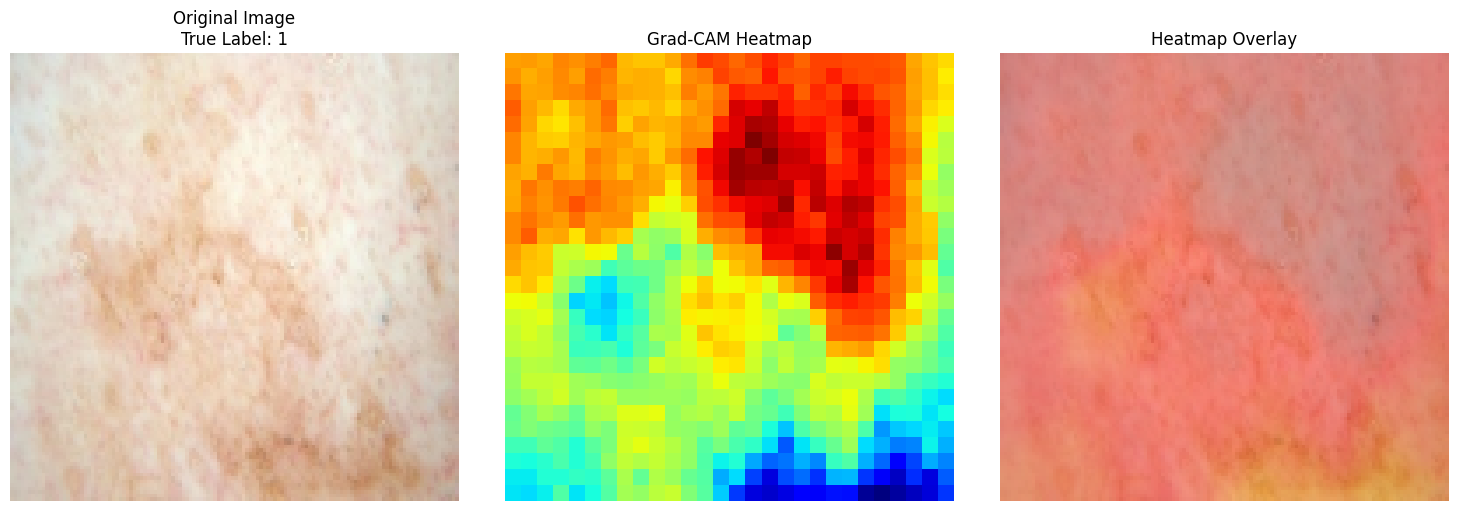

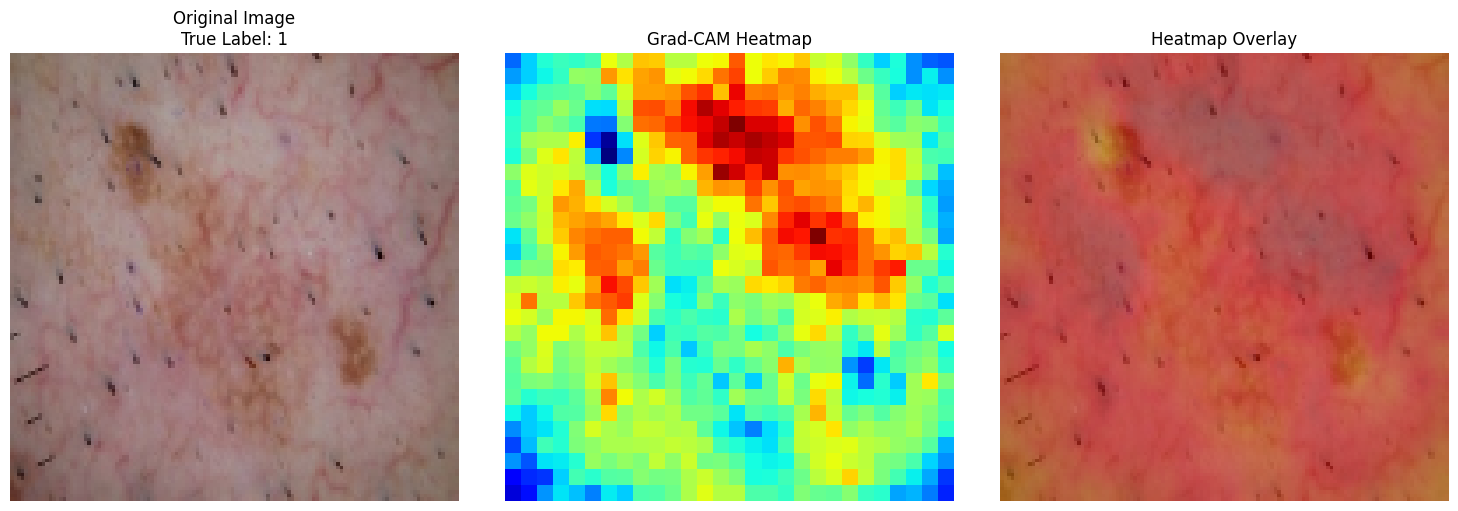

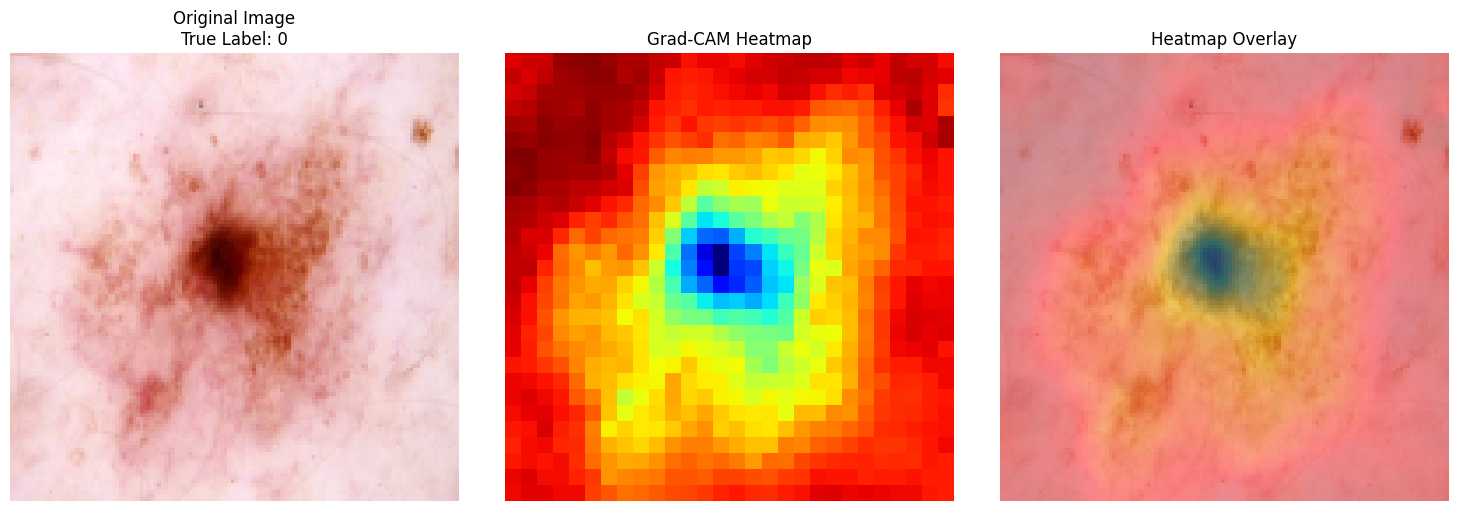

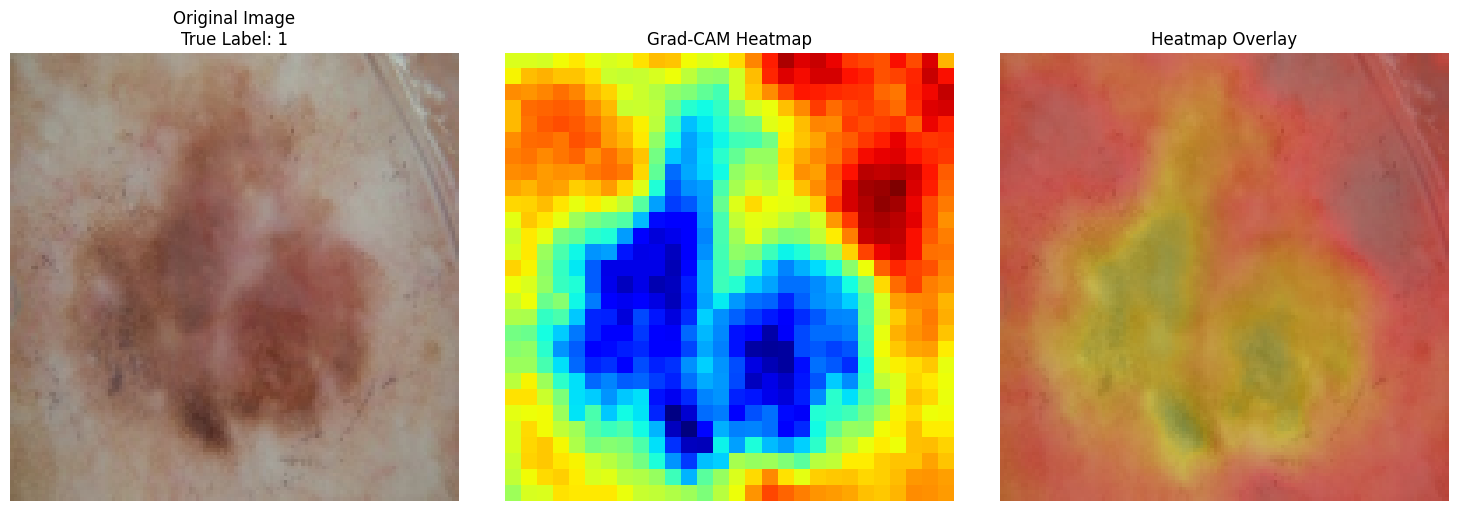

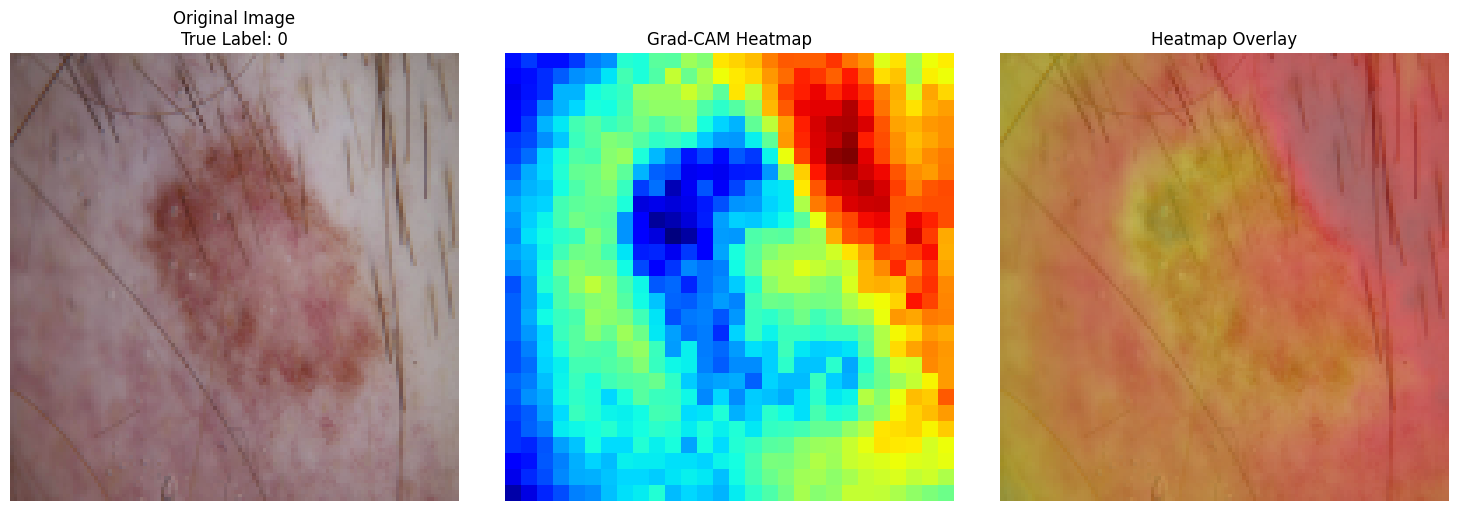

In [ ]:
import matplotlib.pyplot as plt

# Find the last convolutional layer name
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

if last_conv_layer_name is None:
    print("No Conv2D layer found in the model.")
else:
    print(f"Last convolutional layer name: {last_conv_layer_name}")

    # Iterate through sample images, generate and display Grad-CAM heatmaps
    for i in range(len(sample_images)):
        img_array_normalized = sample_images[i]
        true_label = sample_labels[i]

        # Reshape for model input (add batch dimension)
        img_for_gradcam = np.expand_dims(img_array_normalized, axis=0)

        # Generate heatmap
        heatmap = make_gradcam_heatmap(img_for_gradcam, model, last_conv_layer_name)

        # Denormalize image for display (if it was normalized for the model)
        original_img_for_display = (X_test[sample_indices[i]] / 255.0)

        # Overlay heatmap
        # Ensure the image for overlay is in the correct format (BGR for cv2, but matplotlib expects RGB)
        # Since X_test is likely BGR (from cv2.imread), and we want to display with matplotlib (RGB), convert.
        # The overlay_heatmap function assumes img is BGR for cv2.addWeighted, so we pass X_test[sample_indices[i]] directly (which is BGR and 0-255)
        # and then convert the result to RGB for matplotlib display.

        # We need to pass the original (not normalized) image array to overlay_heatmap for correct color mixing
        # and then convert the result to RGB for matplotlib display.
        original_img_bgr_uint8 = X_test[sample_indices[i]] # This is 0-255 BGR
        superimposed_img_bgr = overlay_heatmap(original_img_bgr_uint8, heatmap)
        superimposed_img_rgb = cv2.cvtColor(superimposed_img_bgr, cv2.COLOR_BGR2RGB)

        # Display results
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(original_img_bgr_uint8, cv2.COLOR_BGR2RGB))
        plt.title(f"Original Image\nTrue Label: {true_label}")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(heatmap, cmap='jet')
        plt.title("Grad-CAM Heatmap")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(superimposed_img_rgb)
        plt.title("Heatmap Overlay")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

**Reasoning**:
The `cv2.addWeighted` error indicates that the dimensions or number of channels of the heatmap and the original image do not match. The current `overlay_heatmap` function has two issues: it incorrectly scales the input image (which is already in the 0-255 range) and does not resize the heatmap to the original image's dimensions. I will fix this by removing the erroneous scaling and adding a step to resize the heatmap to match the input image before overlaying.



In [ ]:
def overlay_heatmap(img, heatmap, alpha=0.4):
    # img is expected to be a uint8, 3-channel image (0-255 range)
    # heatmap is expected to be a float, single-channel heatmap (0-1 range)

    # Get original image dimensions
    h, w = img.shape[:2]

    # Resize heatmap to original image dimensions
    heatmap_resized = cv2.resize(heatmap, (w, h))

    # Rescale heatmap to a range 0-255 and apply colormap
    heatmap_rescaled_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_rescaled_uint8, cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    # img is already uint8, 3-channel, 0-255, so it can be used directly
    superimposed_img = cv2.addWeighted(heatmap_colored, alpha, img, 1 - alpha, 0)

    return superimposed_img

**Reasoning**:
The `overlay_heatmap` function has been updated to correctly handle image and heatmap dimensions and scaling. Now I will re-execute the plotting code to generate and display the Grad-CAM visualizations, expecting the `cv2.addWeighted` error to be resolved.



Last convolutional layer name: conv2d_11


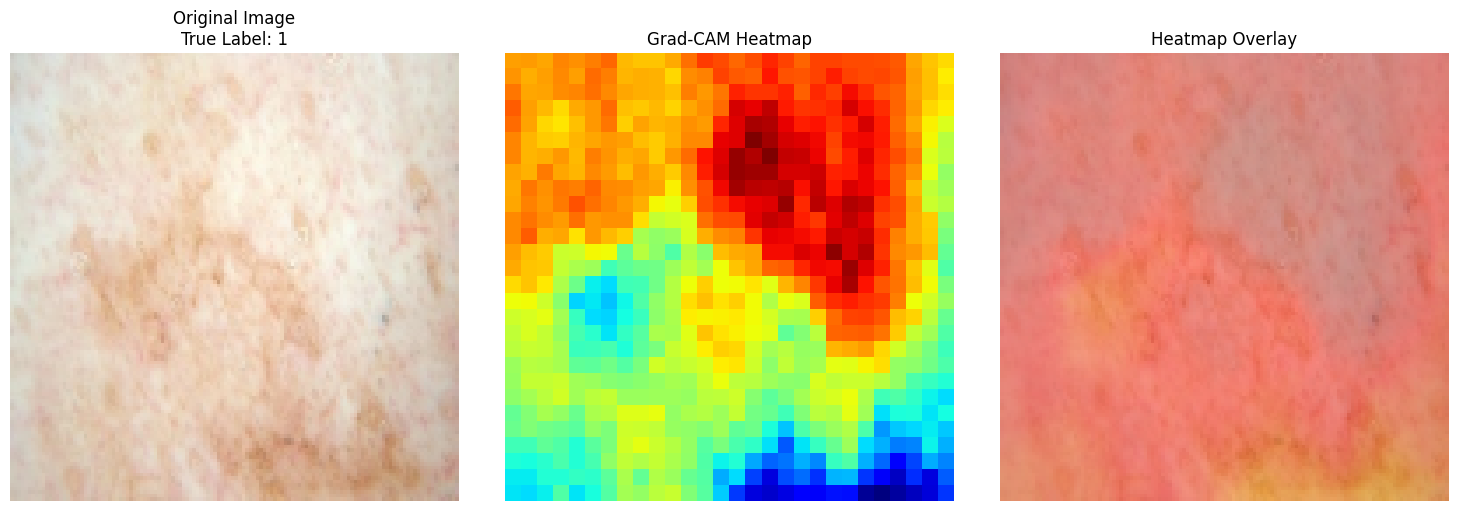

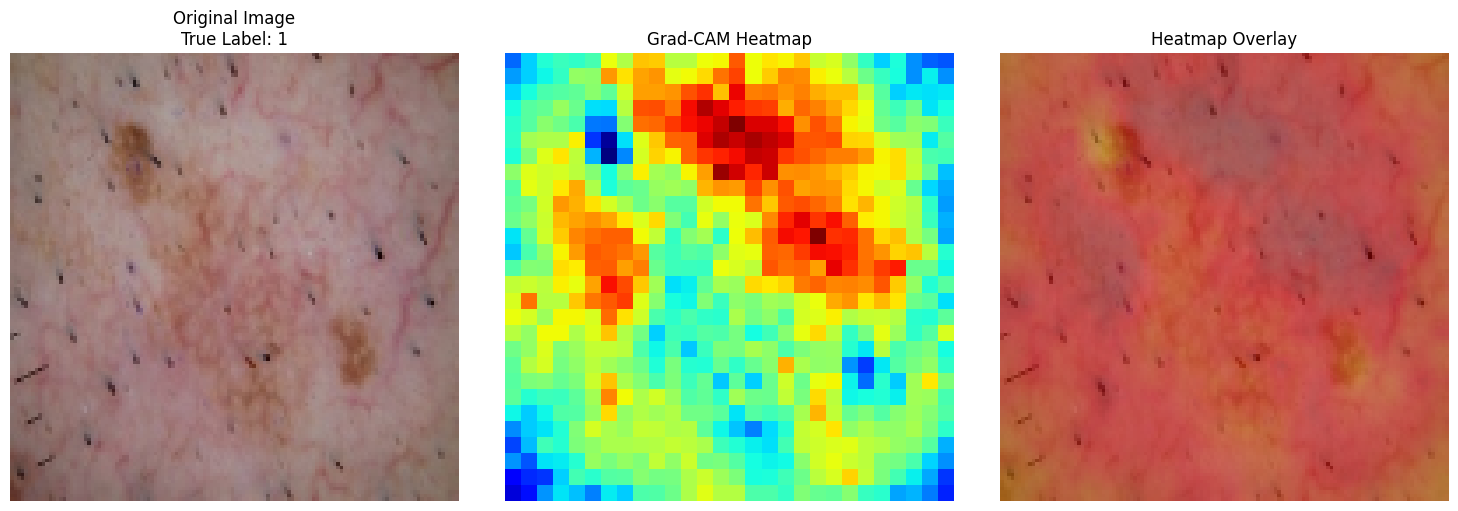

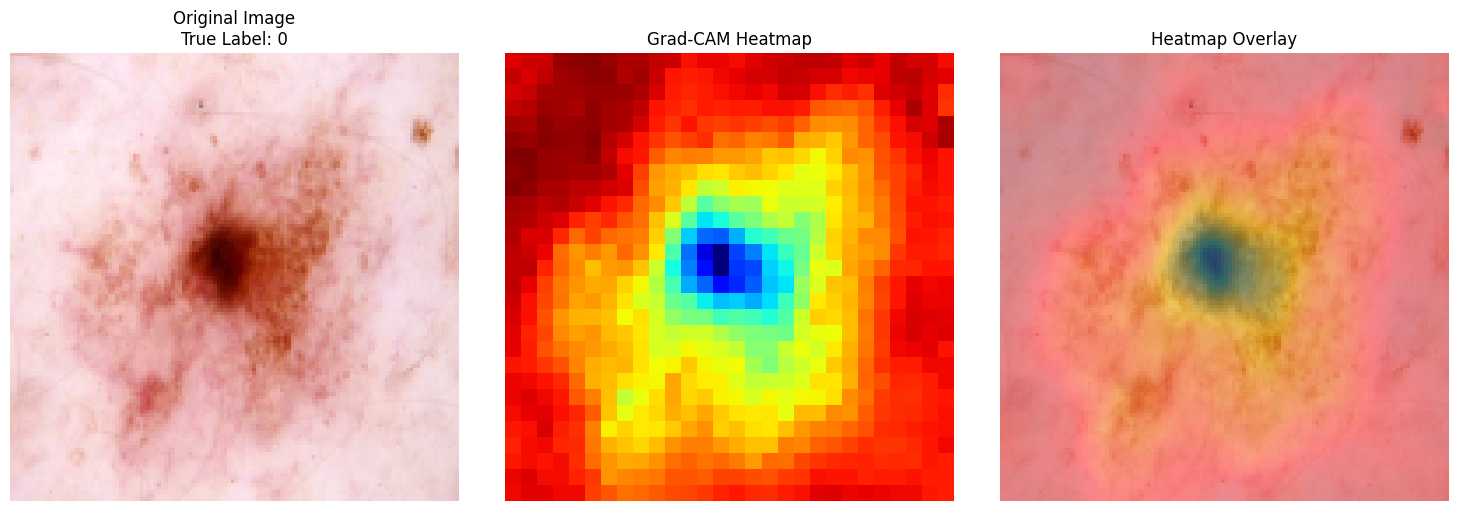

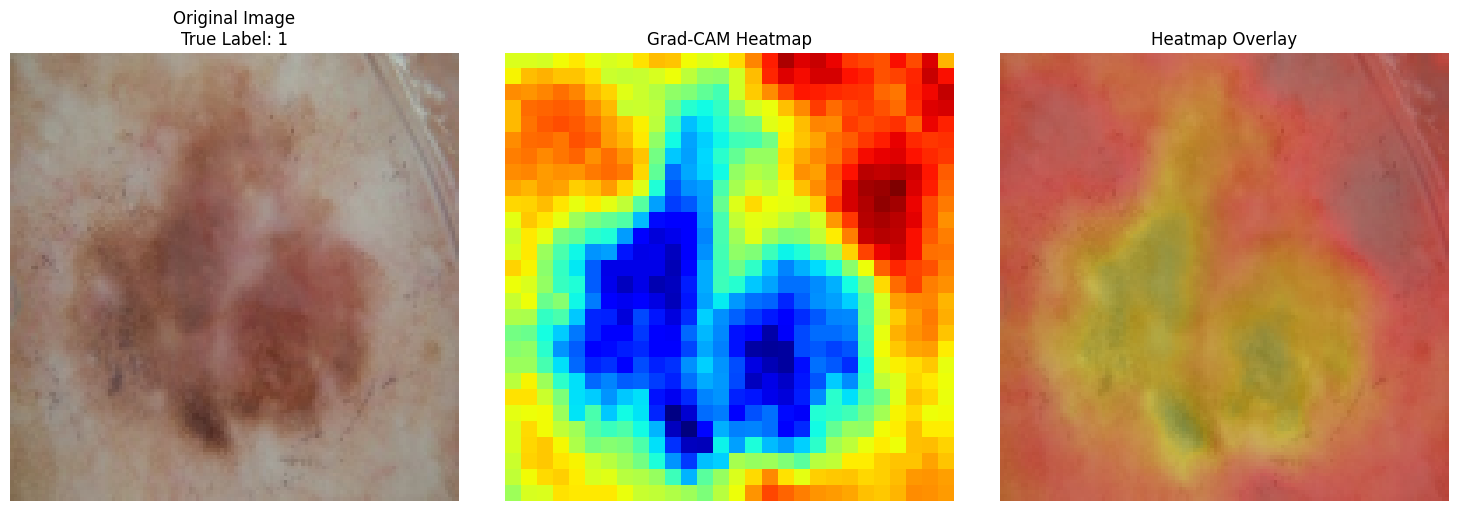

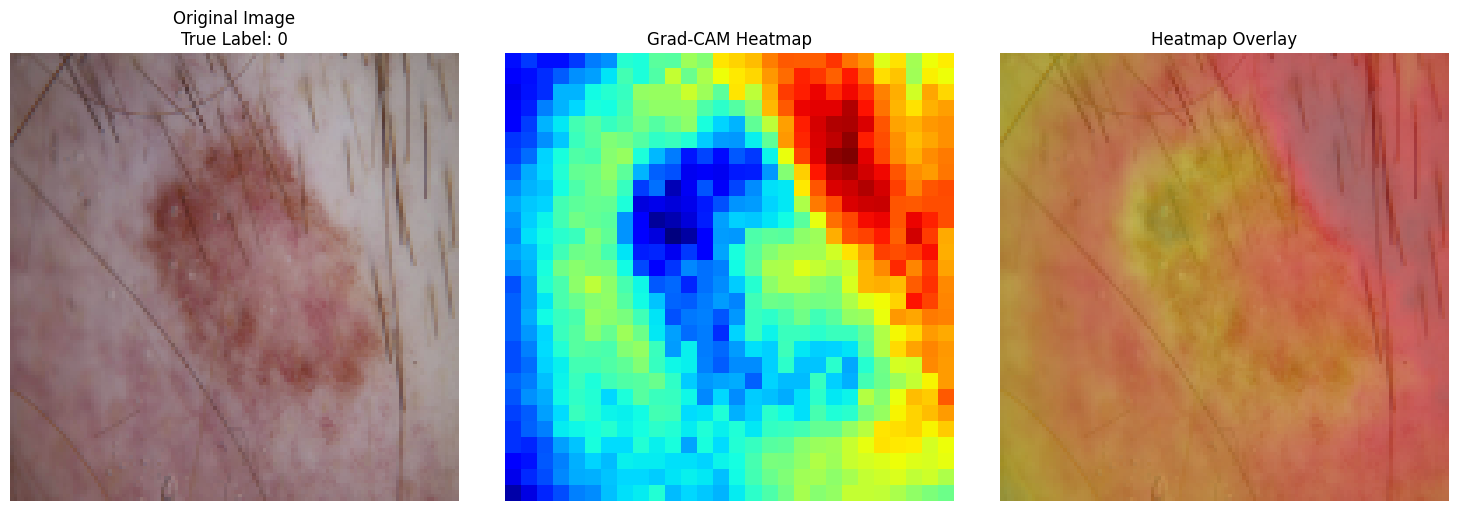

In [ ]:
import matplotlib.pyplot as plt

# Find the last convolutional layer name
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

if last_conv_layer_name is None:
    print("No Conv2D layer found in the model.")
else:
    print(f"Last convolutional layer name: {last_conv_layer_name}")

    # Iterate through sample images, generate and display Grad-CAM heatmaps
    for i in range(len(sample_images)):
        img_array_normalized = sample_images[i]
        true_label = sample_labels[i]

        # Reshape for model input (add batch dimension)
        img_for_gradcam = np.expand_dims(img_array_normalized, axis=0)

        # Generate heatmap
        heatmap = make_gradcam_heatmap(img_for_gradcam, model, last_conv_layer_name)

        # Denormalize image for display (if it was normalized for the model)
        original_img_for_display = (X_test[sample_indices[i]] / 255.0)

        # Overlay heatmap
        # Ensure the image for overlay is in the correct format (BGR for cv2, but matplotlib expects RGB)
        # Since X_test is likely BGR (from cv2.imread), and we want to display with matplotlib (RGB), convert.
        # The overlay_heatmap function assumes img is BGR for cv2.addWeighted, so we pass X_test[sample_indices[i]] directly (which is BGR and 0-255)
        # and then convert the result to RGB for matplotlib display.

        # We need to pass the original (not normalized) image array to overlay_heatmap for correct color mixing
        # and then convert the result to RGB for matplotlib display.
        original_img_bgr_uint8 = X_test[sample_indices[i]] # This is 0-255 BGR
        superimposed_img_bgr = overlay_heatmap(original_img_bgr_uint8, heatmap)
        superimposed_img_rgb = cv2.cvtColor(superimposed_img_bgr, cv2.COLOR_BGR2RGB)

        # Display results
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(original_img_bgr_uint8, cv2.COLOR_BGR2RGB))
        plt.title(f"Original Image\nTrue Label: {true_label}")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(heatmap, cmap='jet')
        plt.title("Grad-CAM Heatmap")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(superimposed_img_rgb)
        plt.title("Heatmap Overlay")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

## Summarize Improvements and XAI Insights

### Subtask:
Summarize the improvements in accuracy and handling of class imbalance, along with the insights gained from the Grad-CAM visualizations, explaining how the model is interpreting the images.


# Task
Summarize the entire Google Colab notebook, detailing each cell's content, purpose, code, output, and any errors. Then, generate a downloadable markdown file containing this comprehensive summary, informing the user that this file can be converted to PDF. Finally, display the detailed summary and offer the download.

## Summarize All Notebook Cells in Detail

### Subtask:
Iterate through all the cells in the provided notebook. For each text cell, extract its content. For each code cell, summarize its purpose, list its code, and include its standard output and any errors if present. Compile these summaries into a single, comprehensive markdown string.


**Reasoning**:
I need to iterate through each cell in the notebook, extract relevant information (content, output, errors, status), and format it into a comprehensive markdown string as specified in the instructions. This requires a code block to access and process the notebook's structure.



In [1]:
notebook_summary = []

for cell in notebook.cells:
    if cell.cell_type == 'text_cell':
        notebook_summary.append(f"### Text Cell\n{cell.content}\n")
    elif cell.cell_type == 'code_cell':
        notebook_summary.append(f"### Code Cell (ID: {cell.cell_id})\n")
        notebook_summary.append(f"```python\n{cell.content}\n```\n")

        if cell.standard_output:
            notebook_summary.append(f"#### Standard Output:\n```\n{cell.standard_output}\n```\n")
        if cell.standard_error:
            notebook_summary.append(f"#### Standard Error:\n```\n{cell.standard_error}\n```\n")
        notebook_summary.append(f"*Execution Status: {cell.execution_status}*\n\n")

final_notebook_summary = "\n".join(notebook_summary)
print("Notebook summary compiled successfully.")
# The final_notebook_summary variable now holds the complete markdown string.

NameError: name 'notebook' is not defined